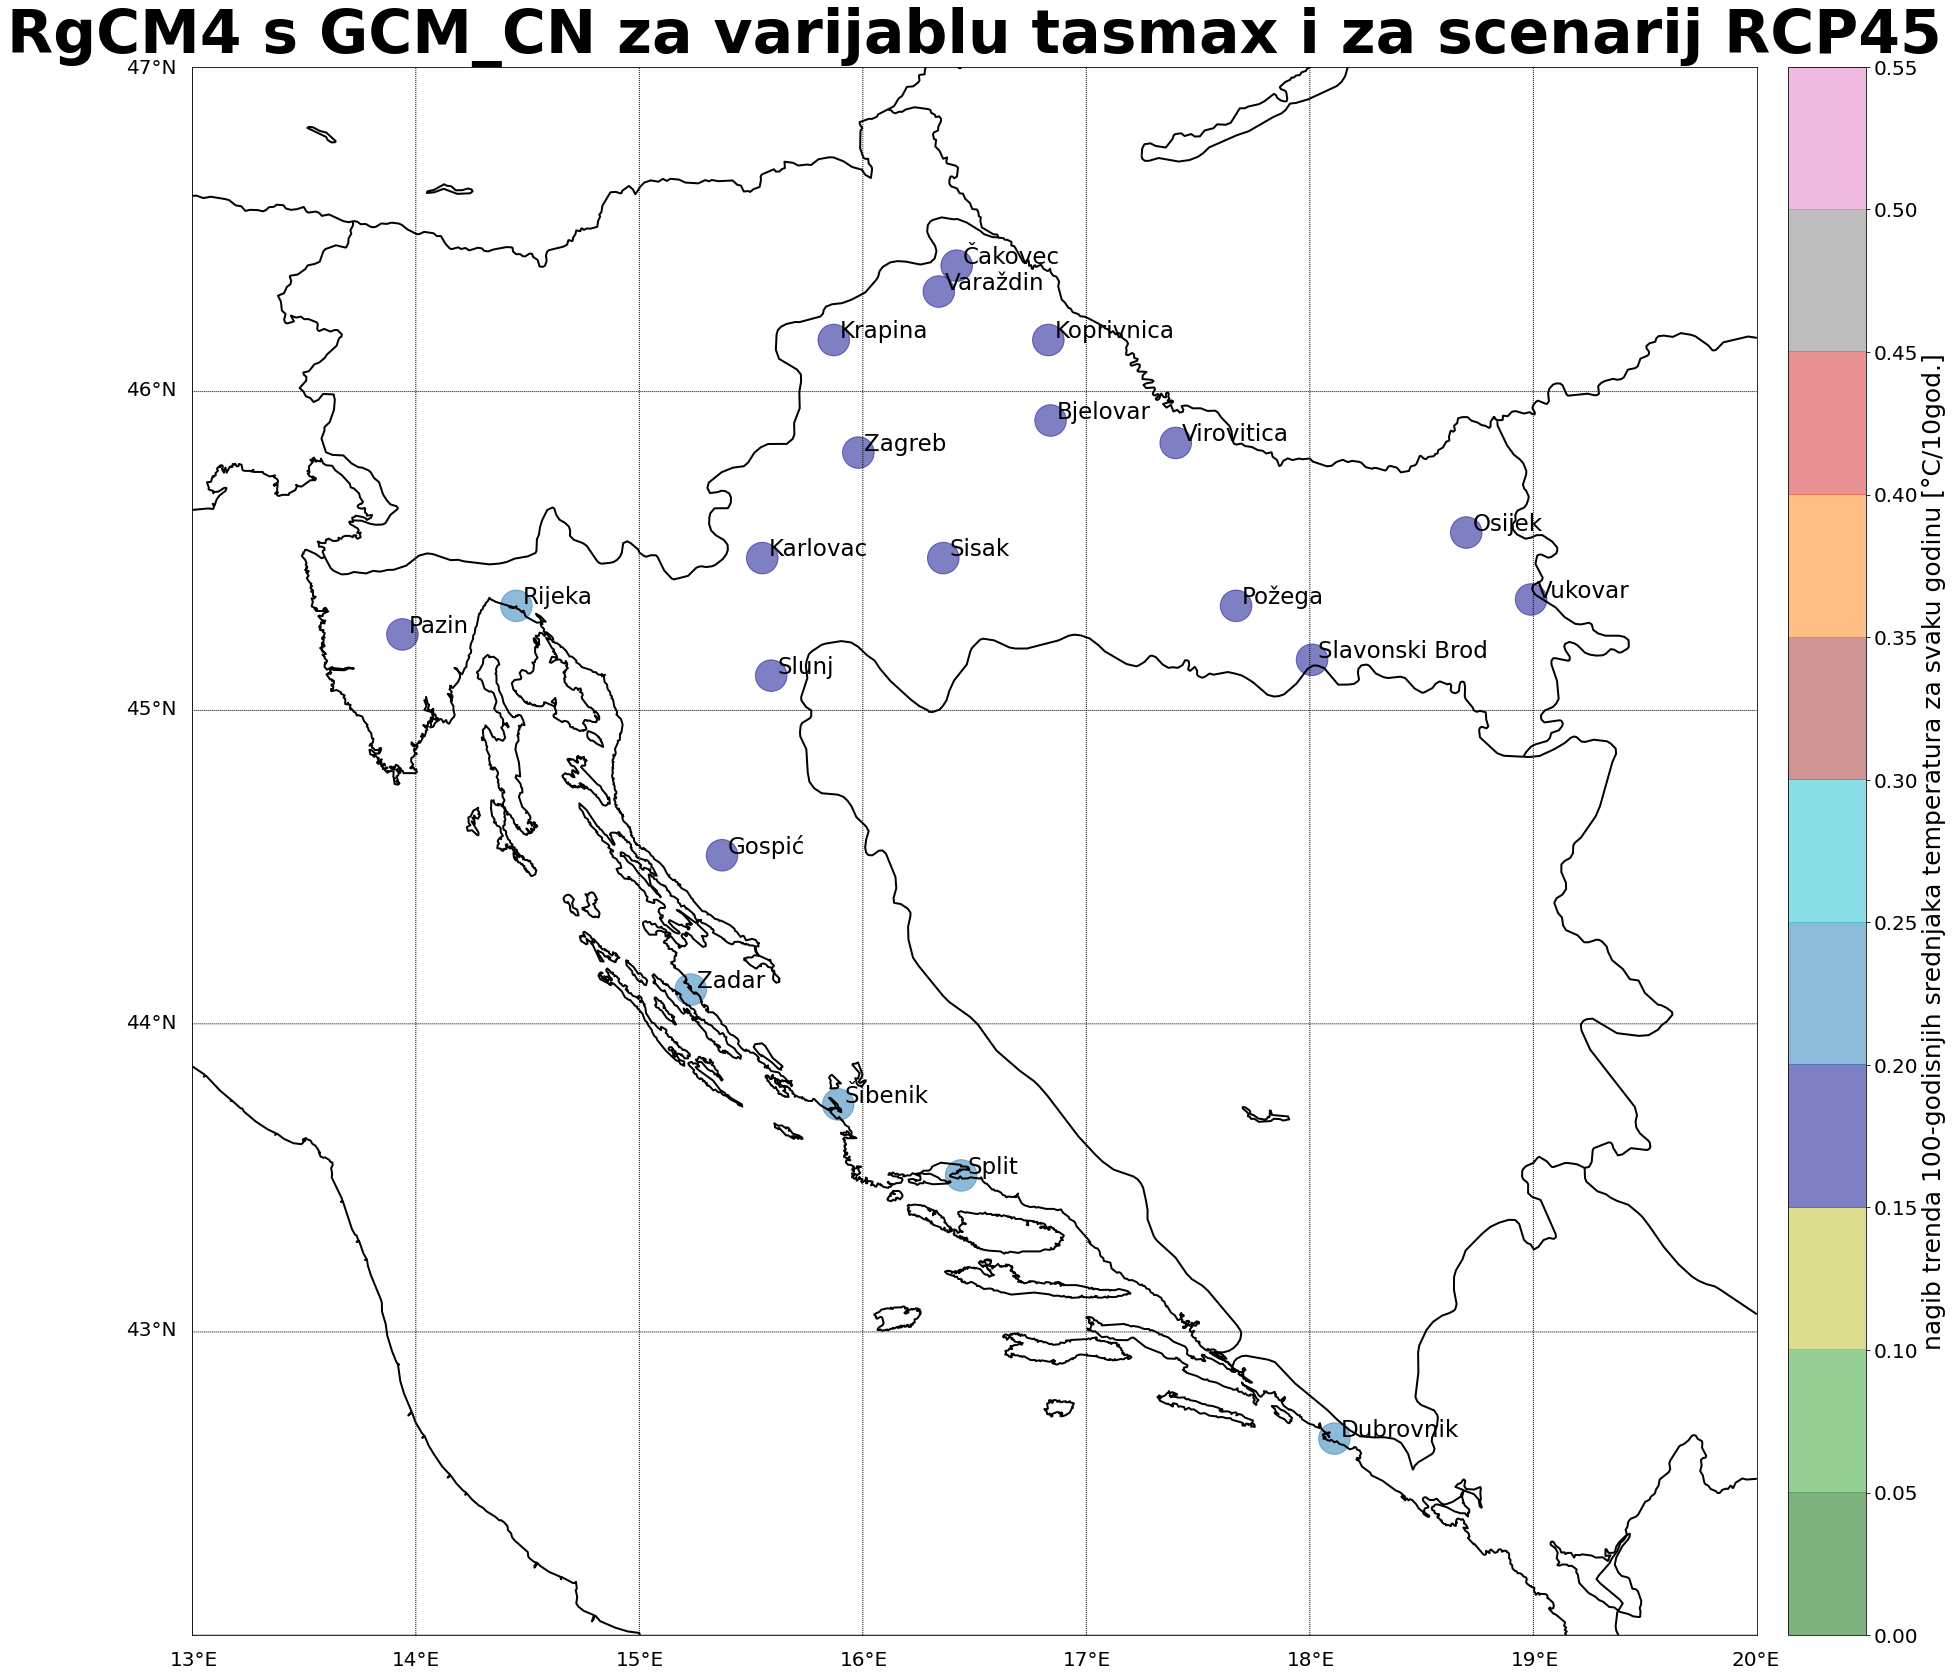

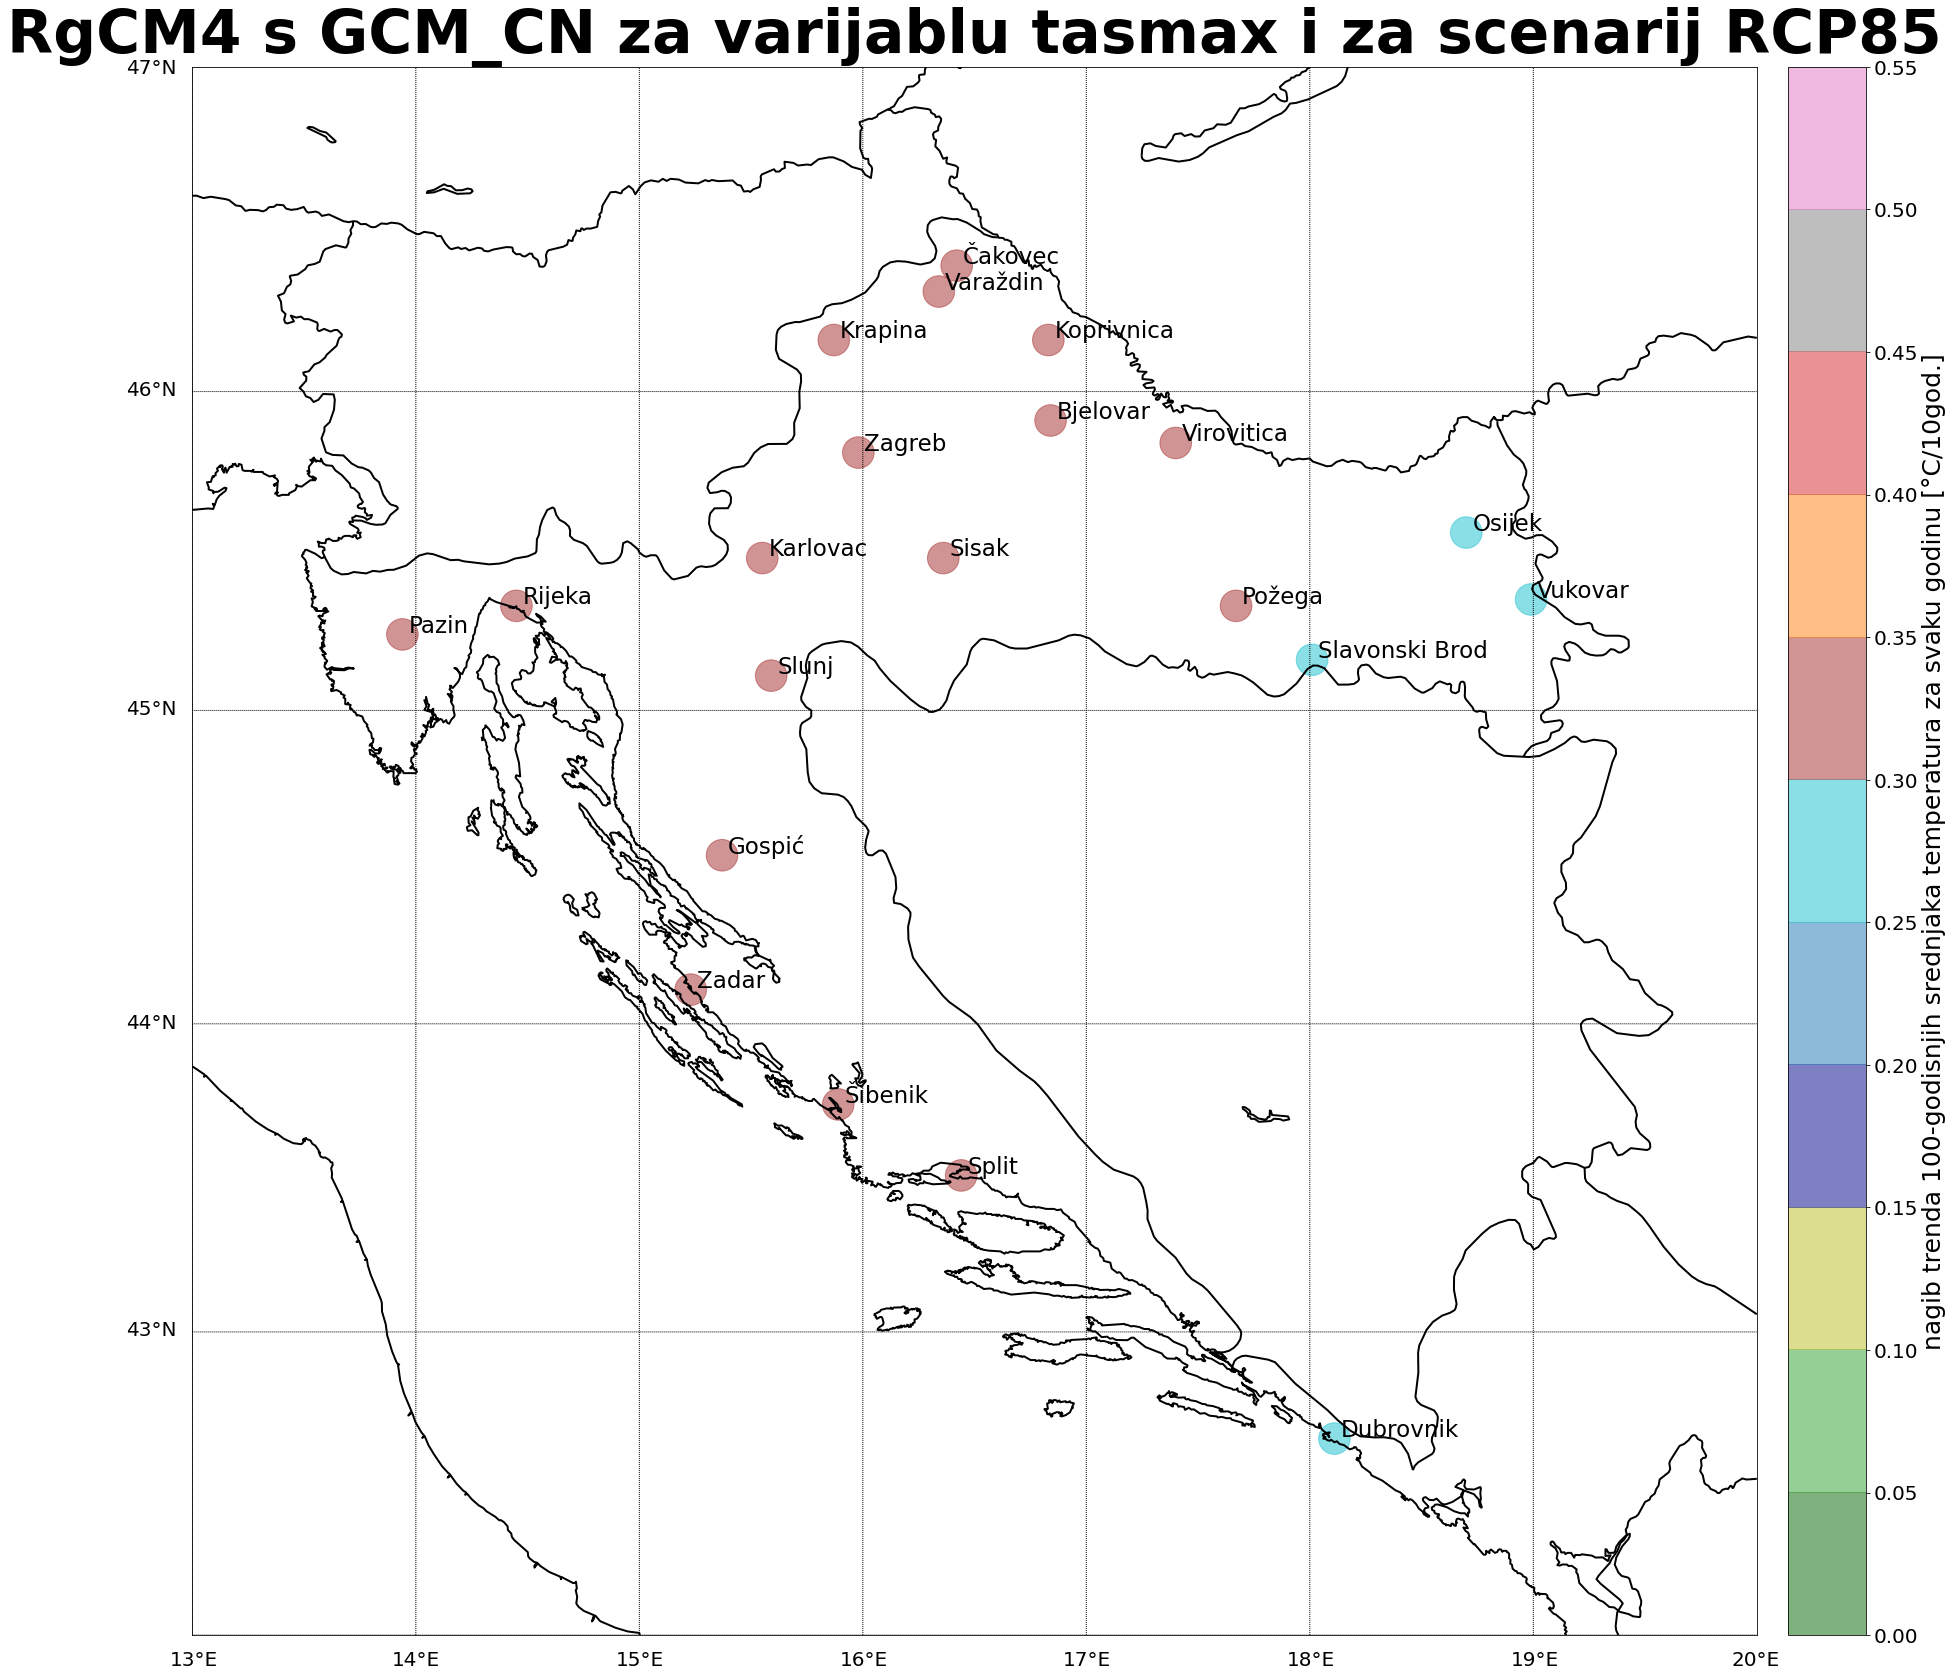

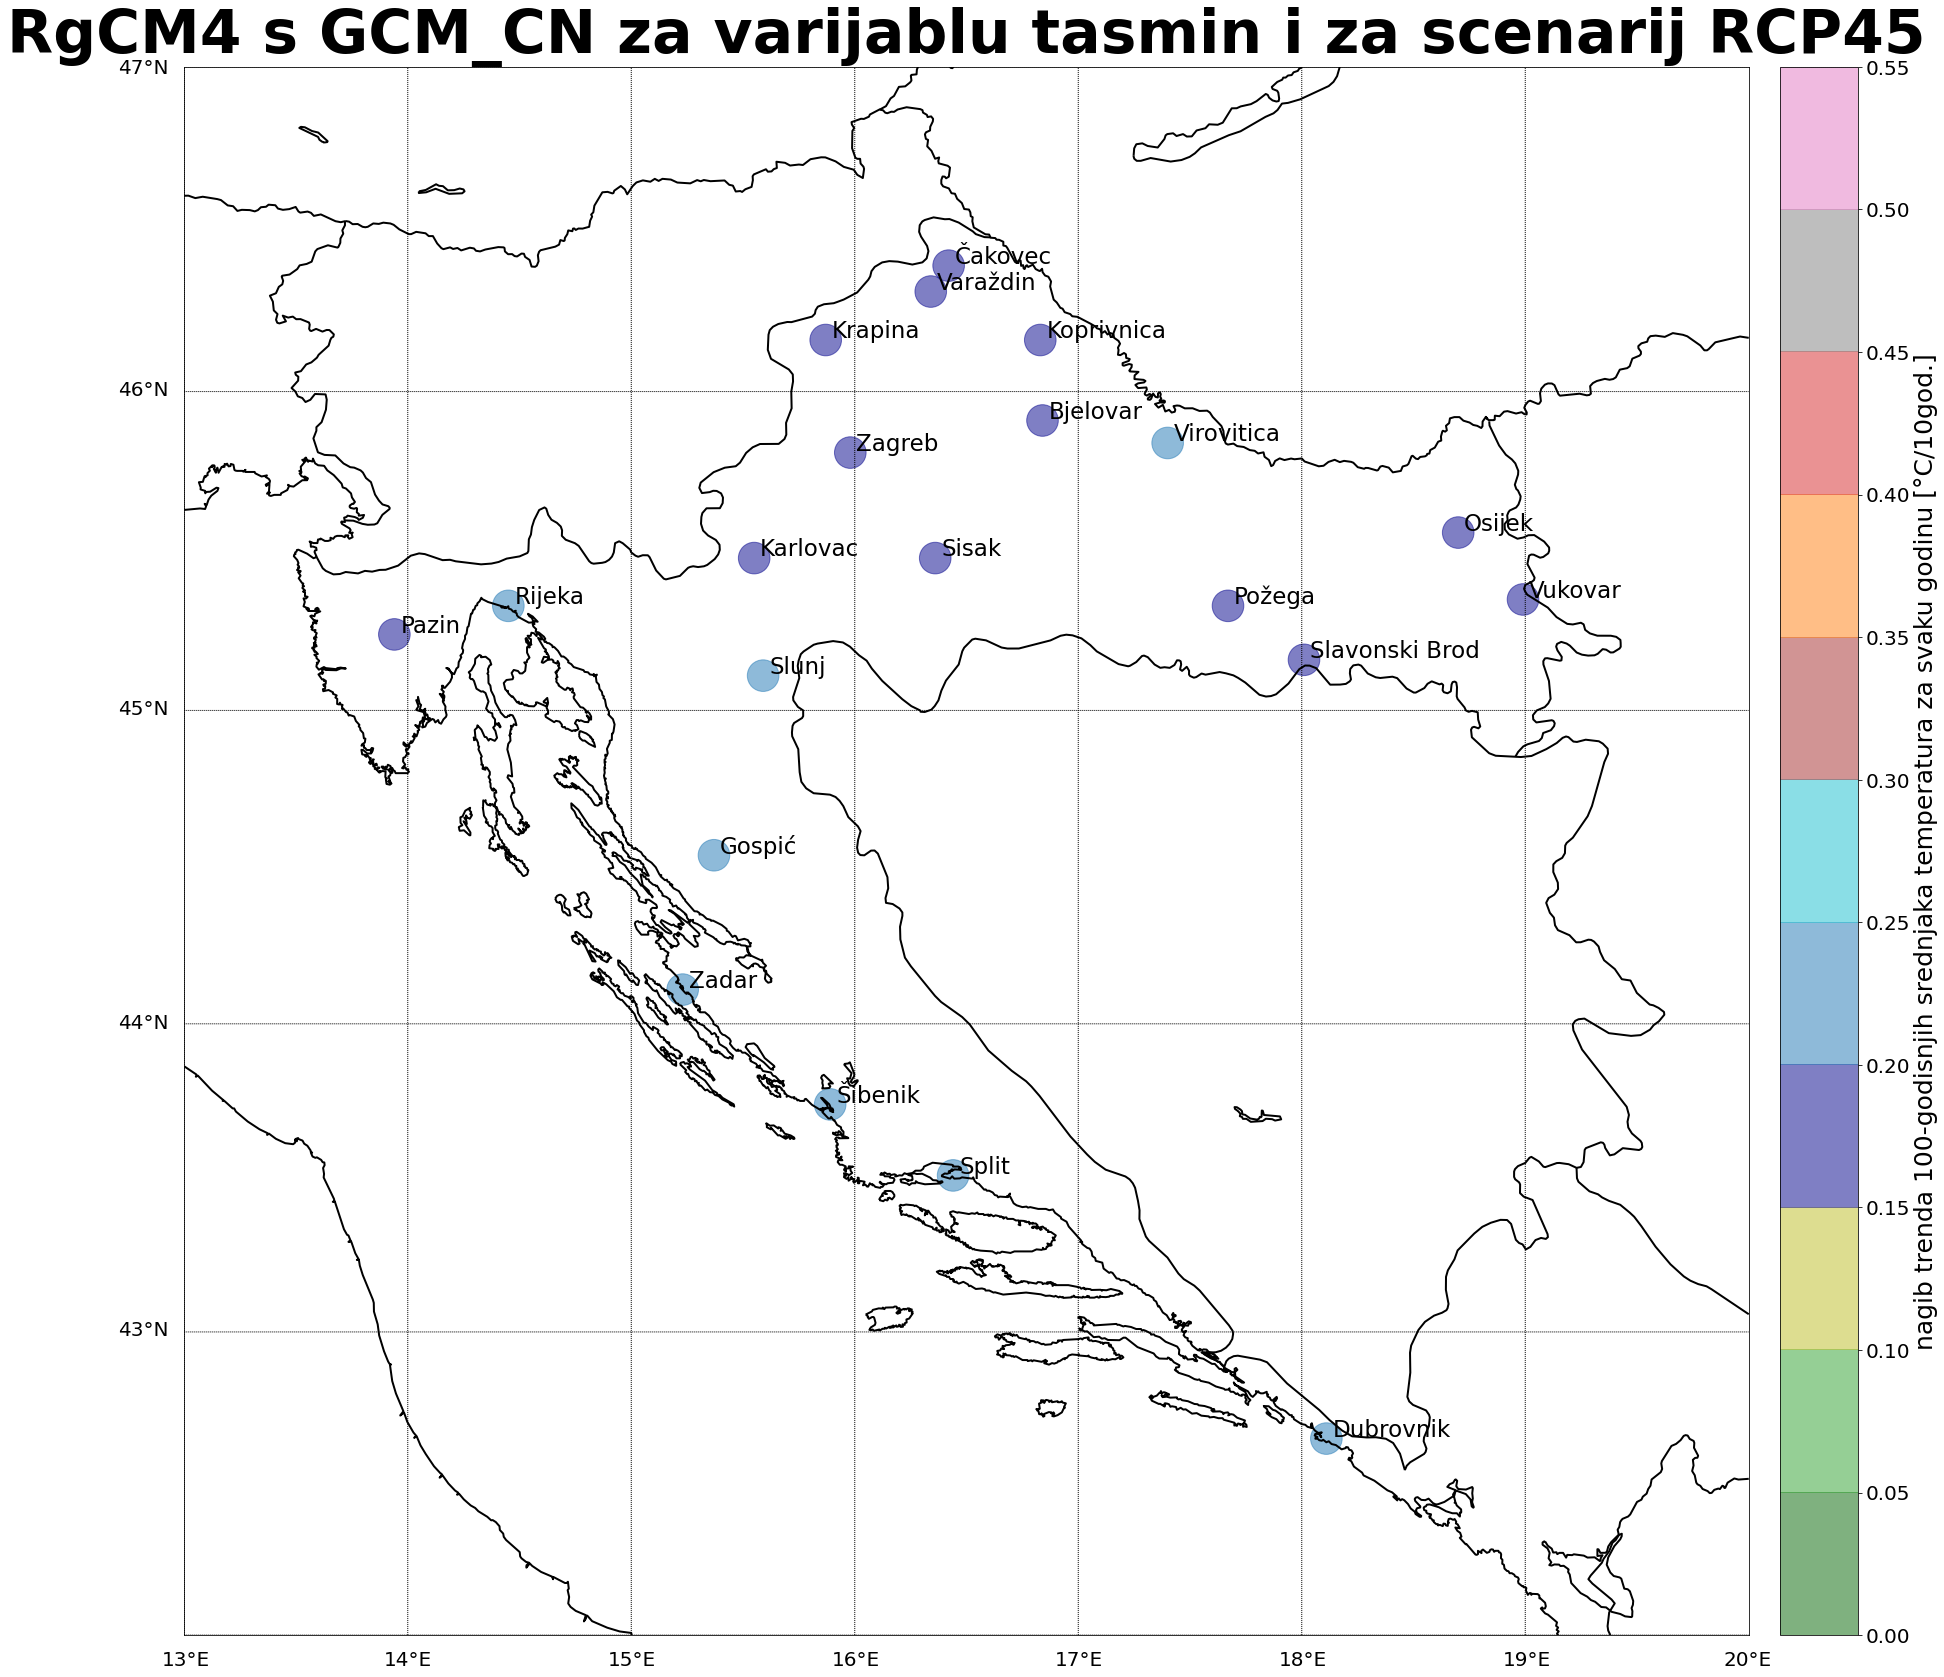

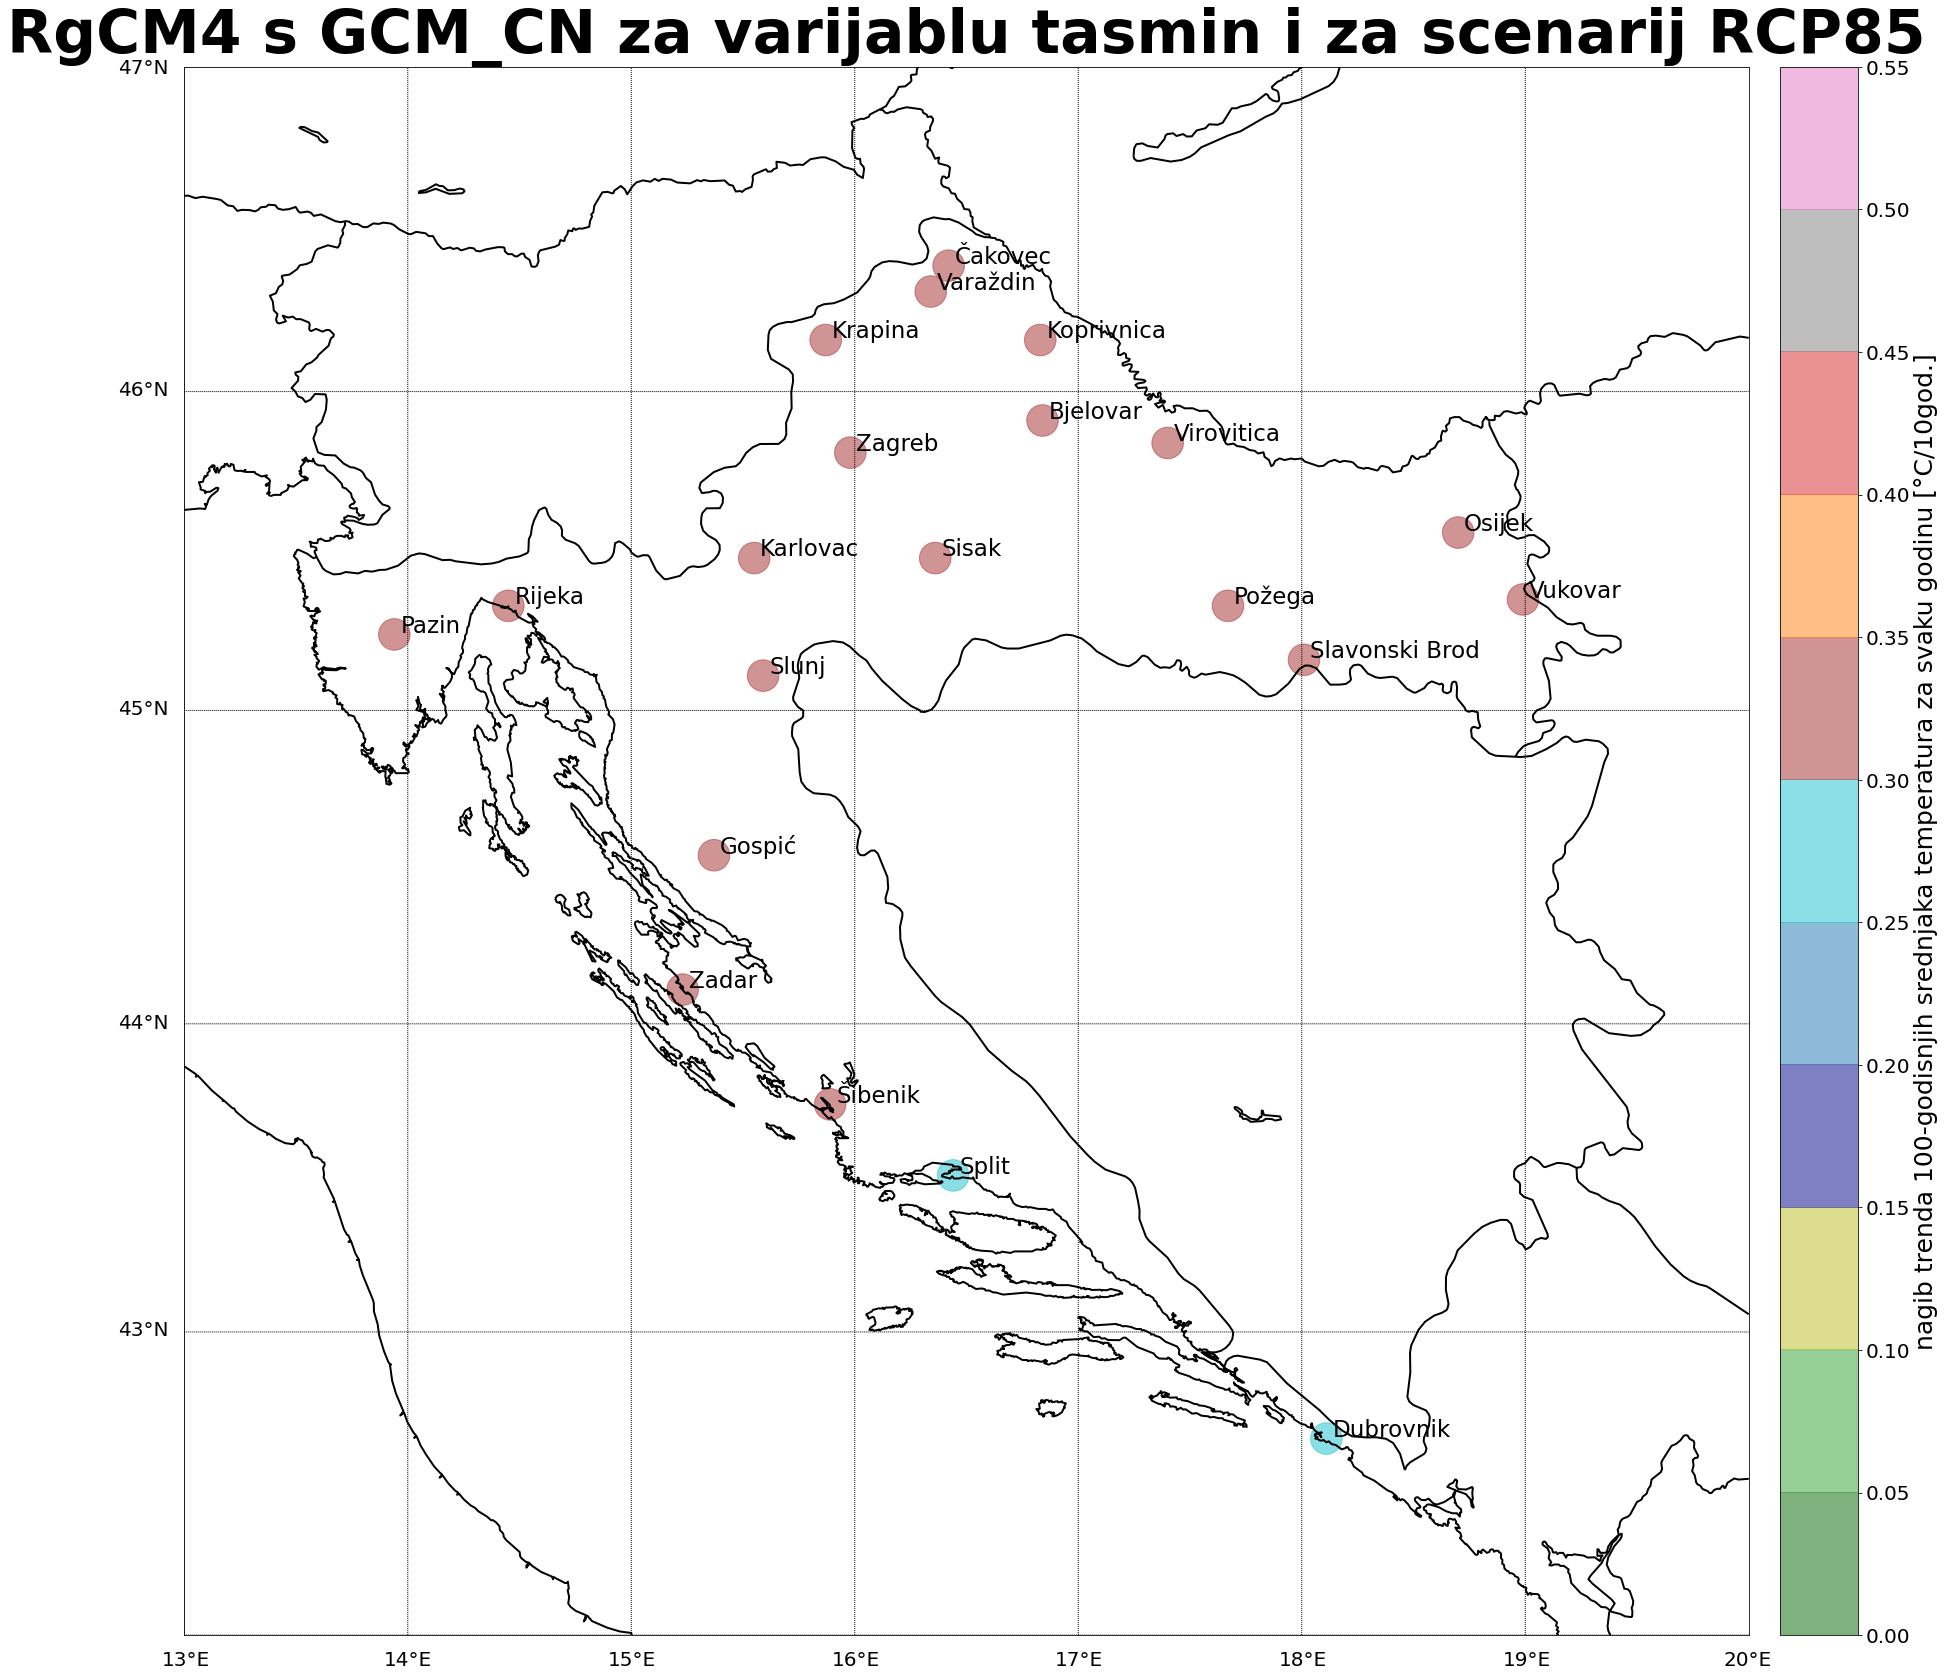

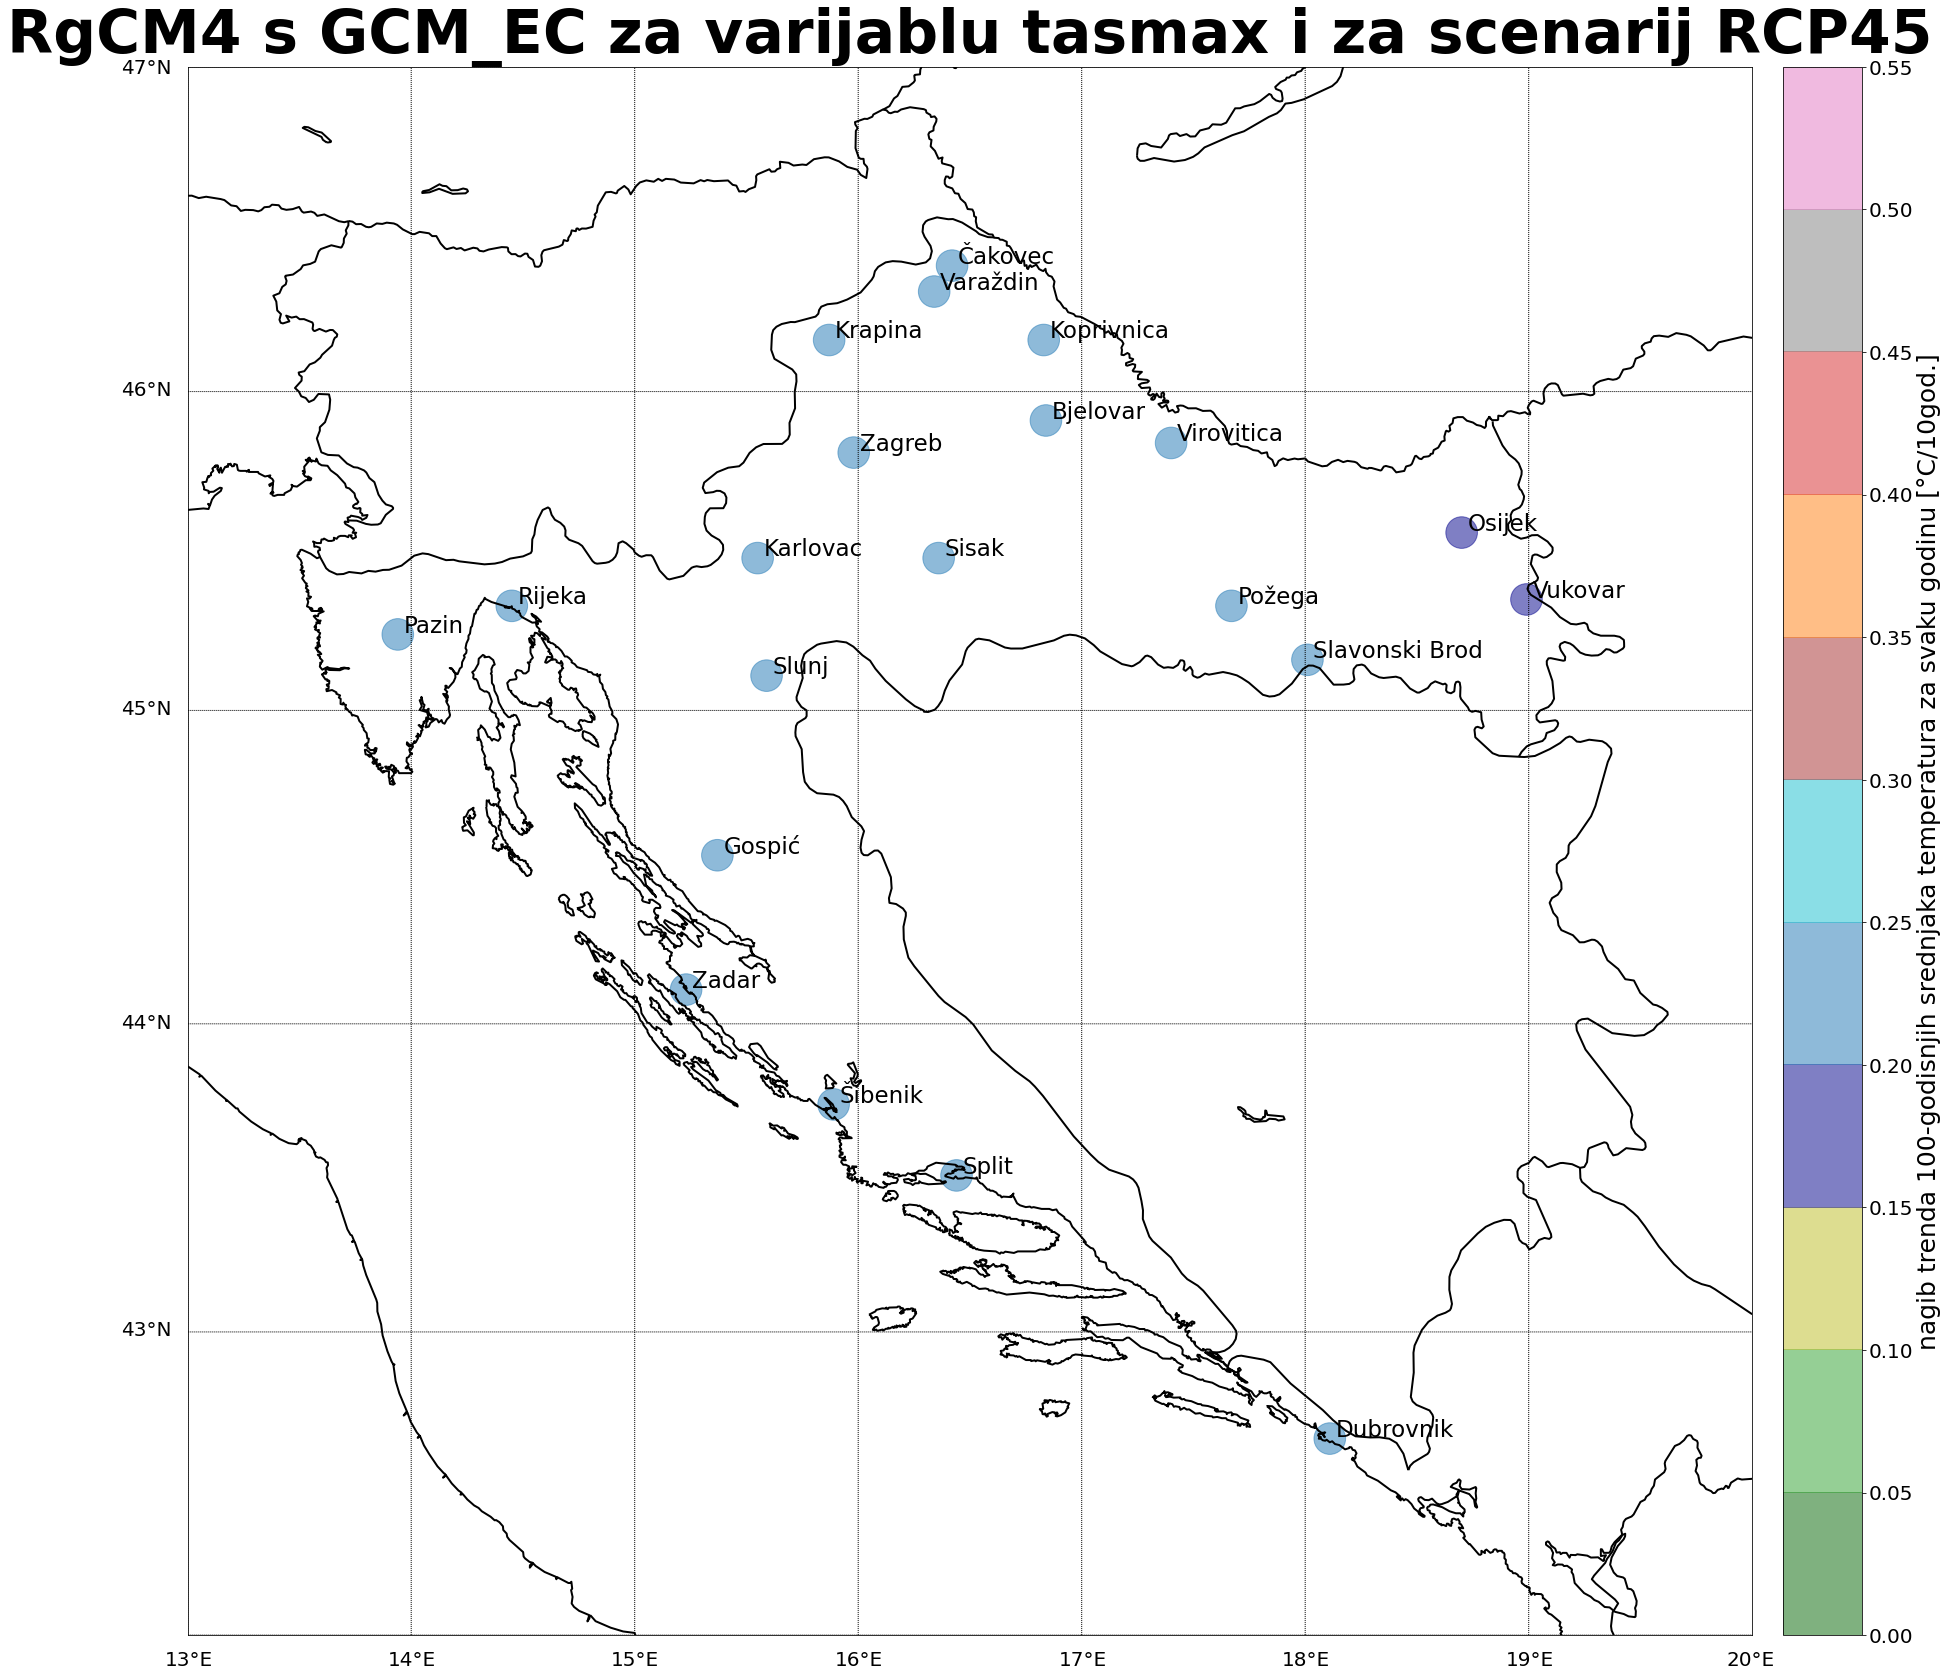

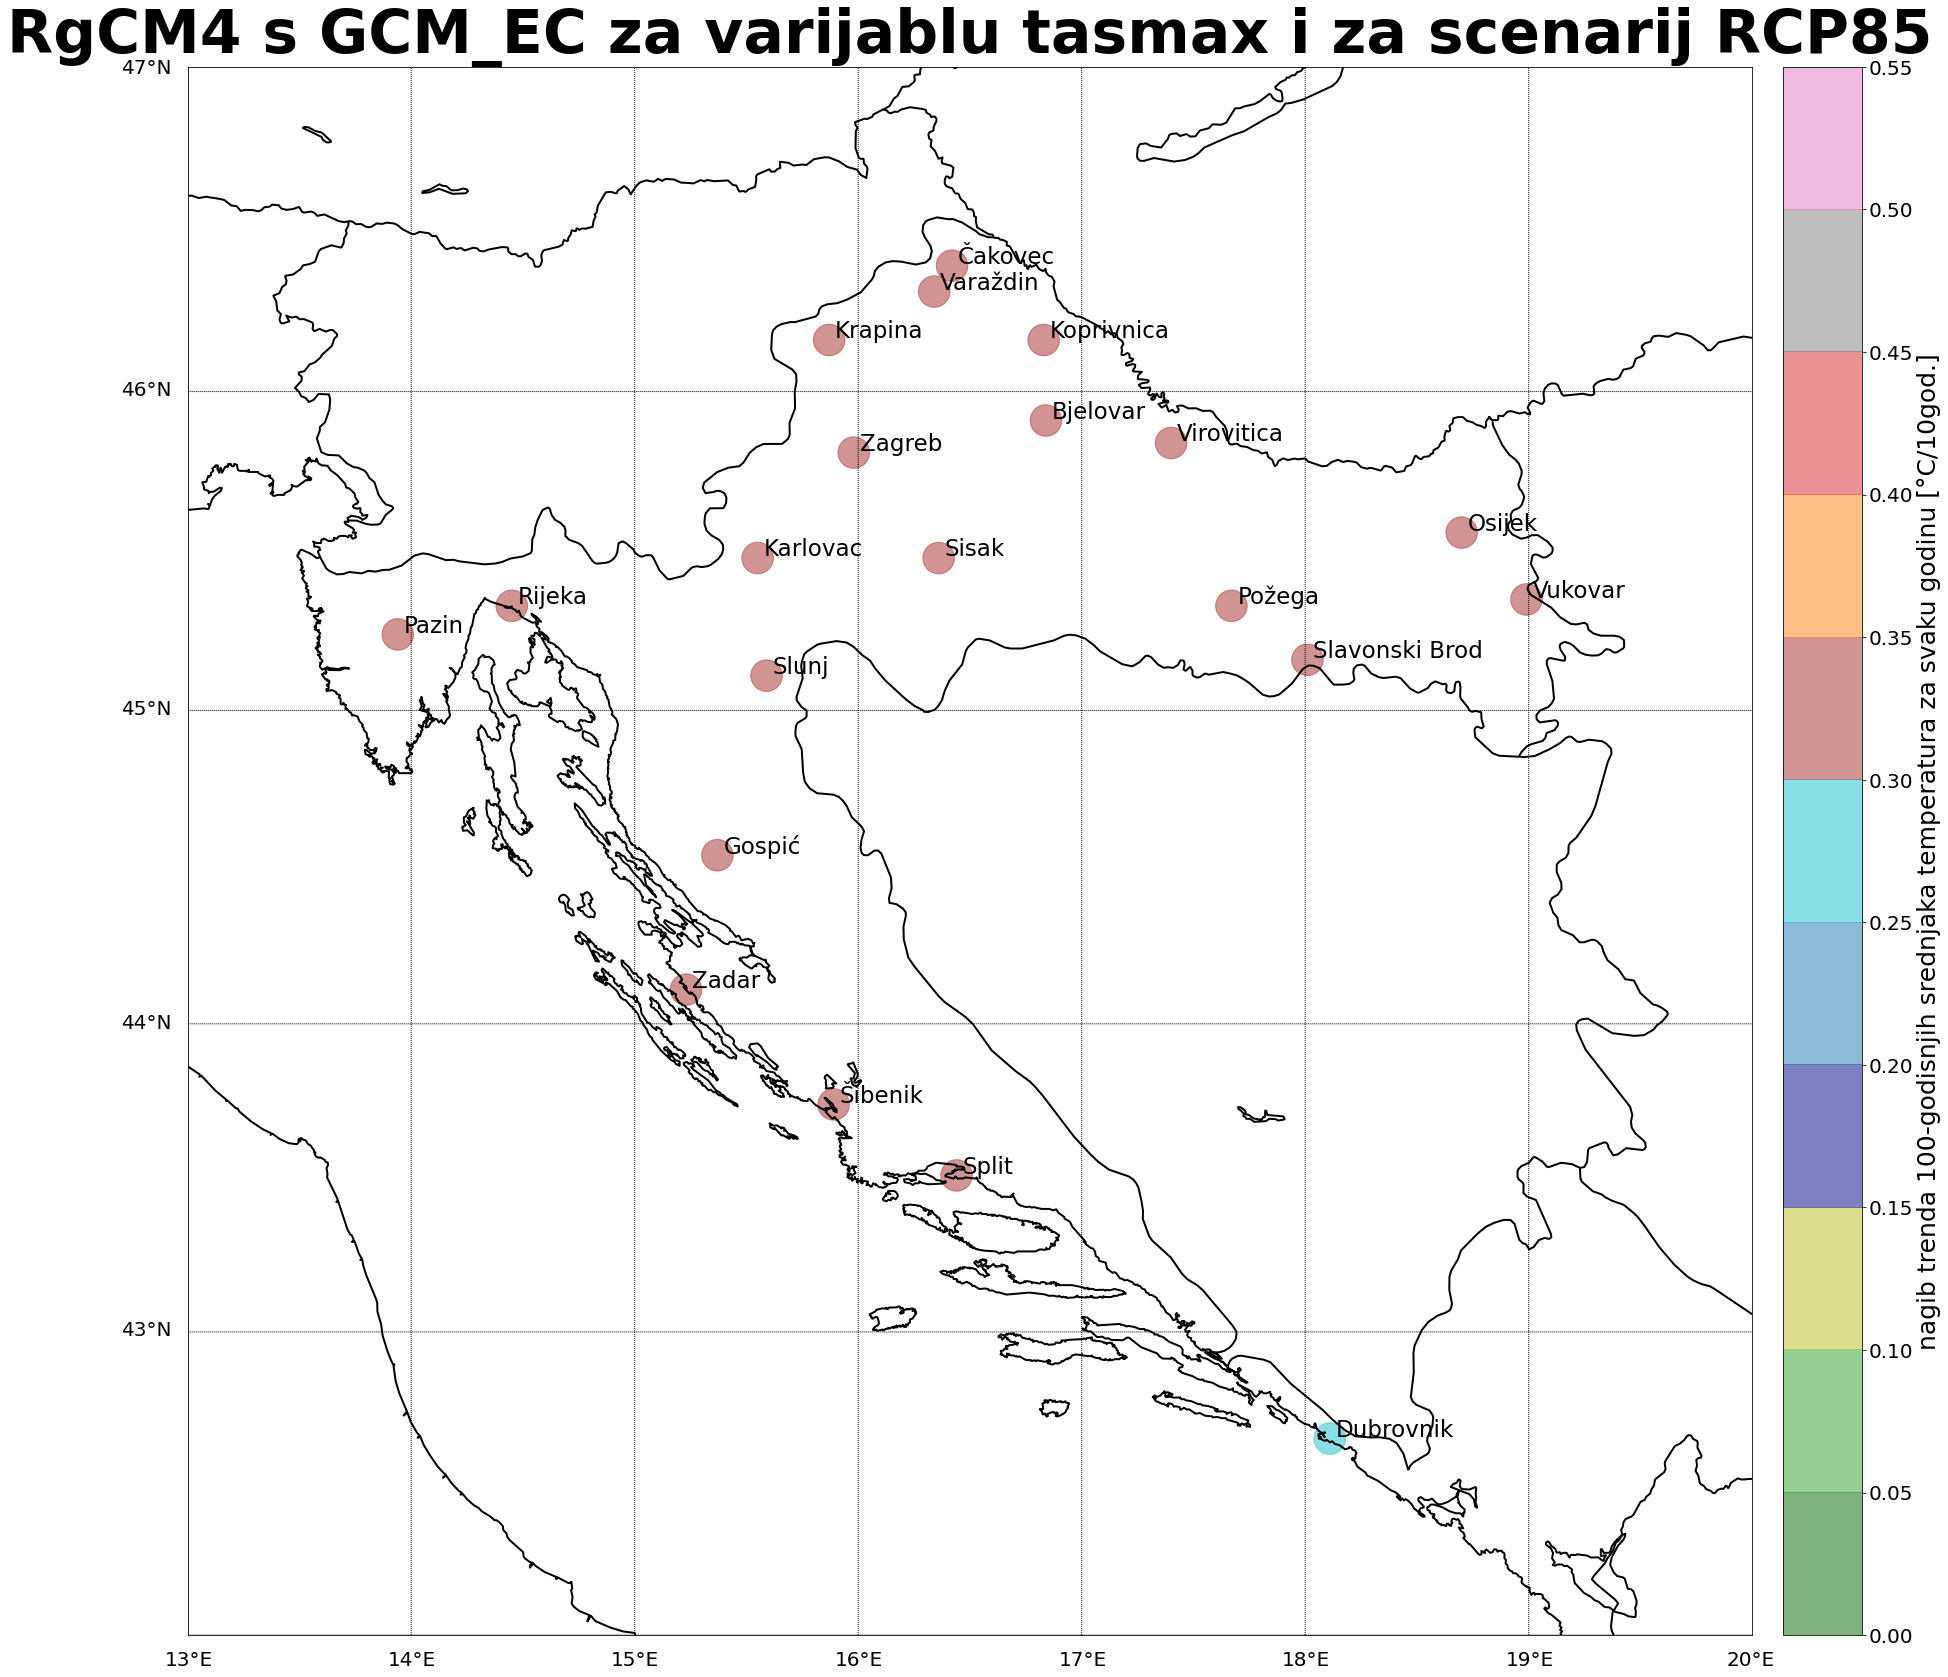

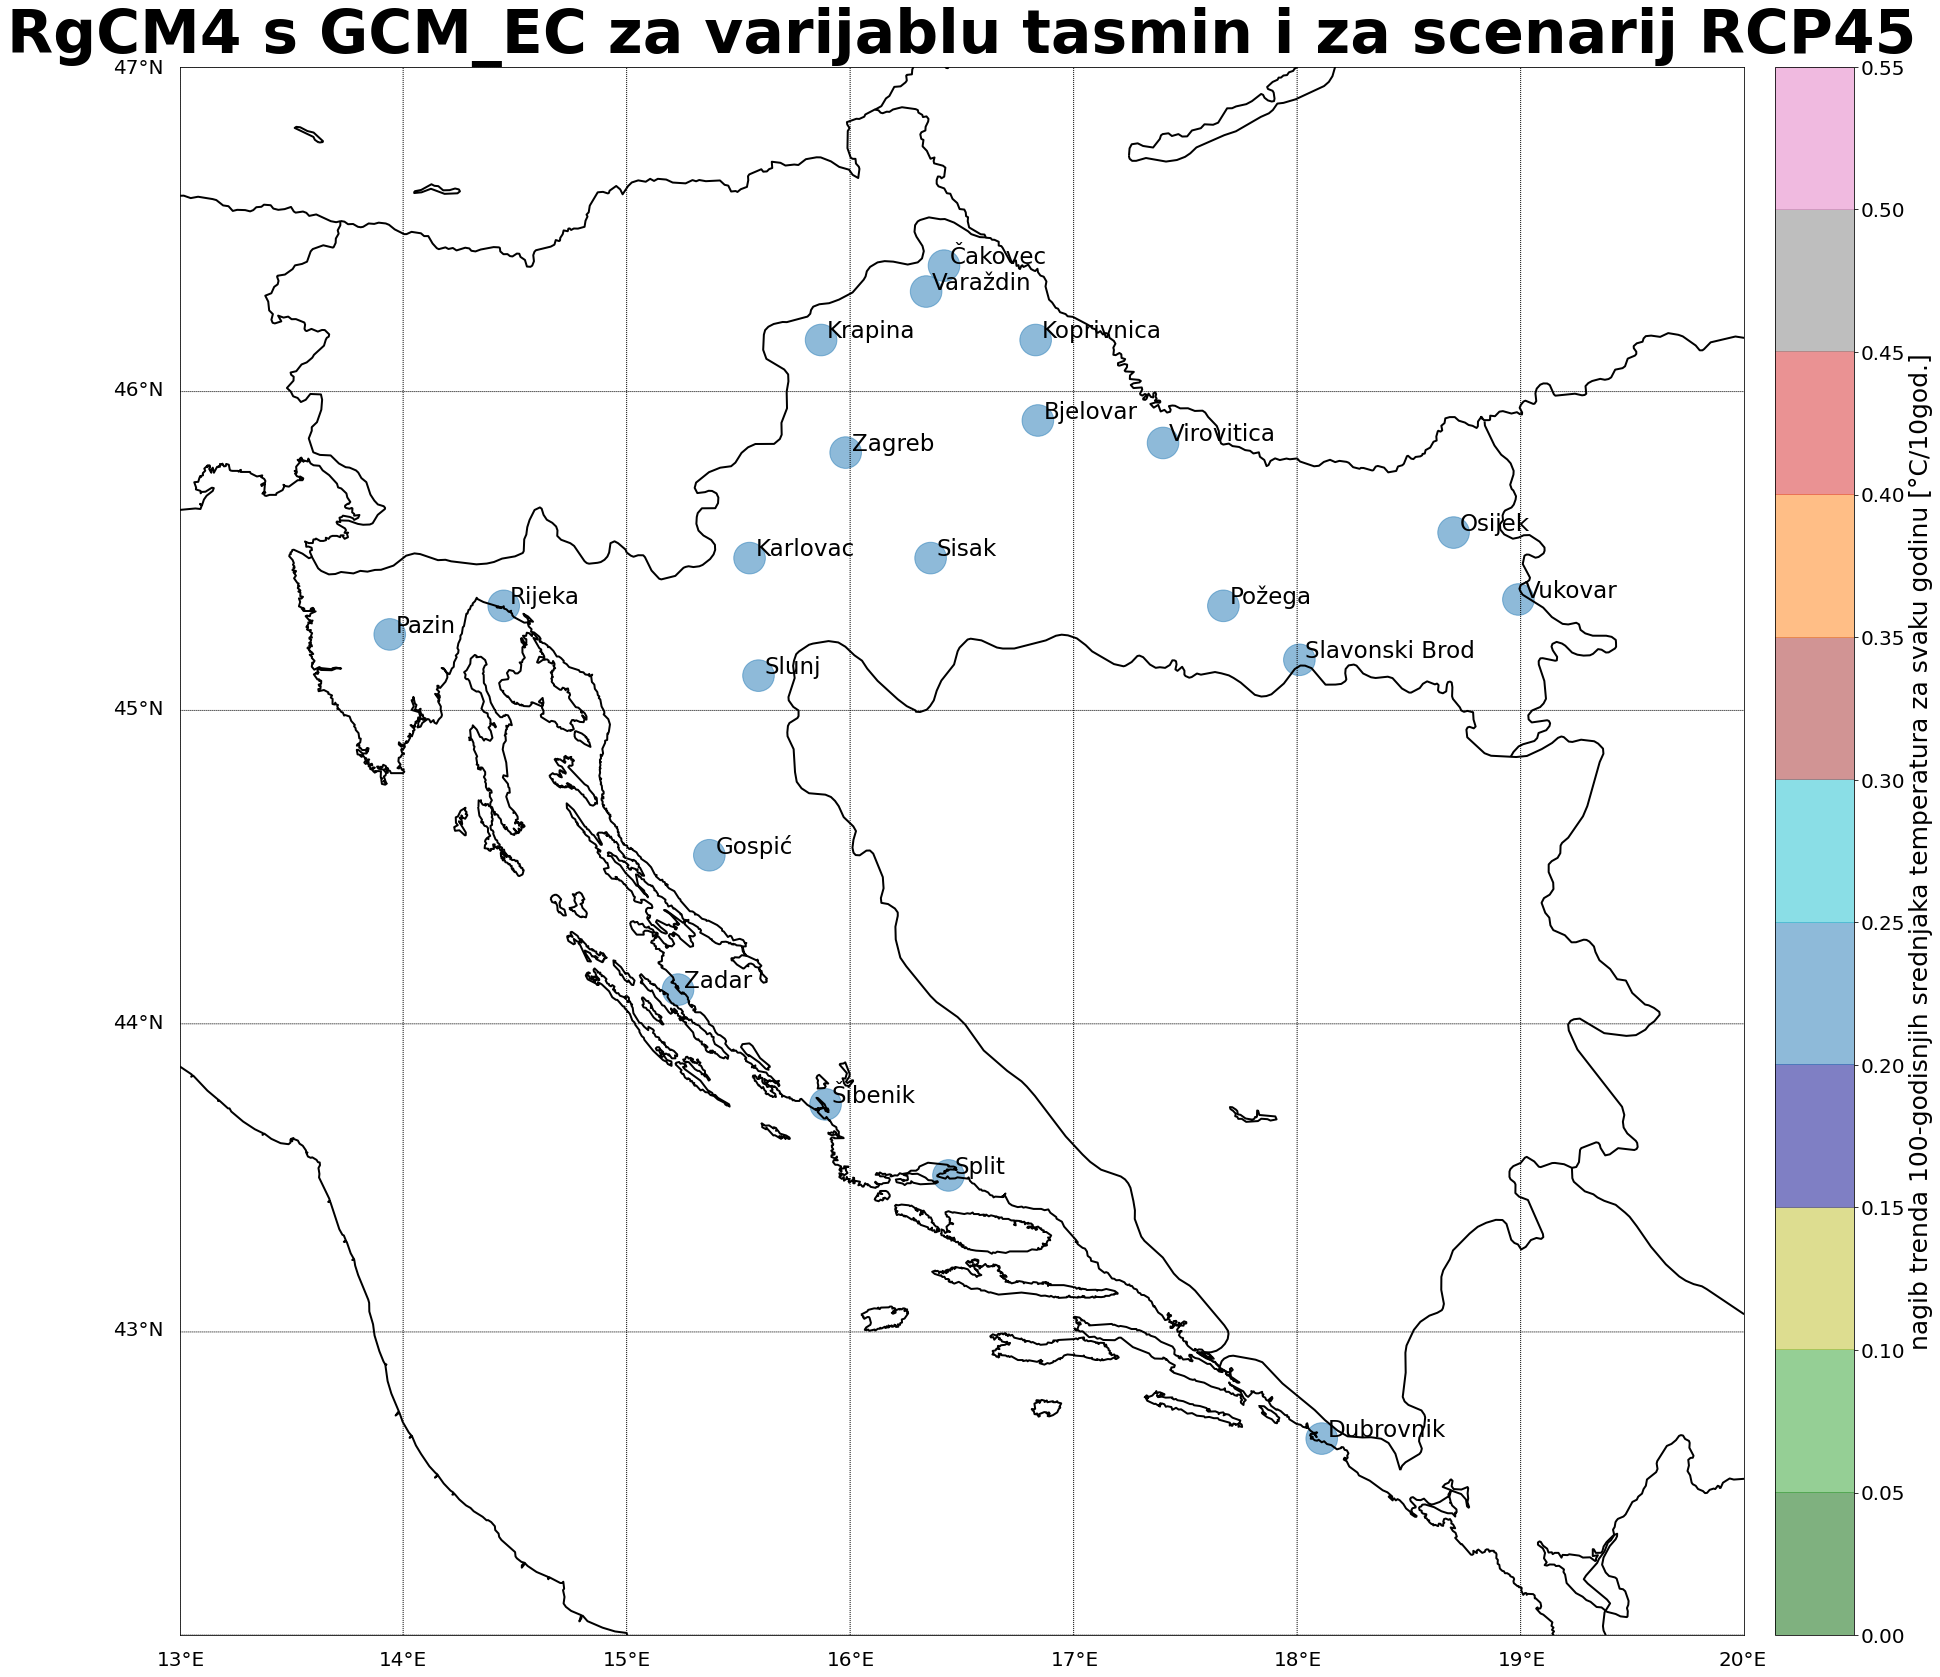

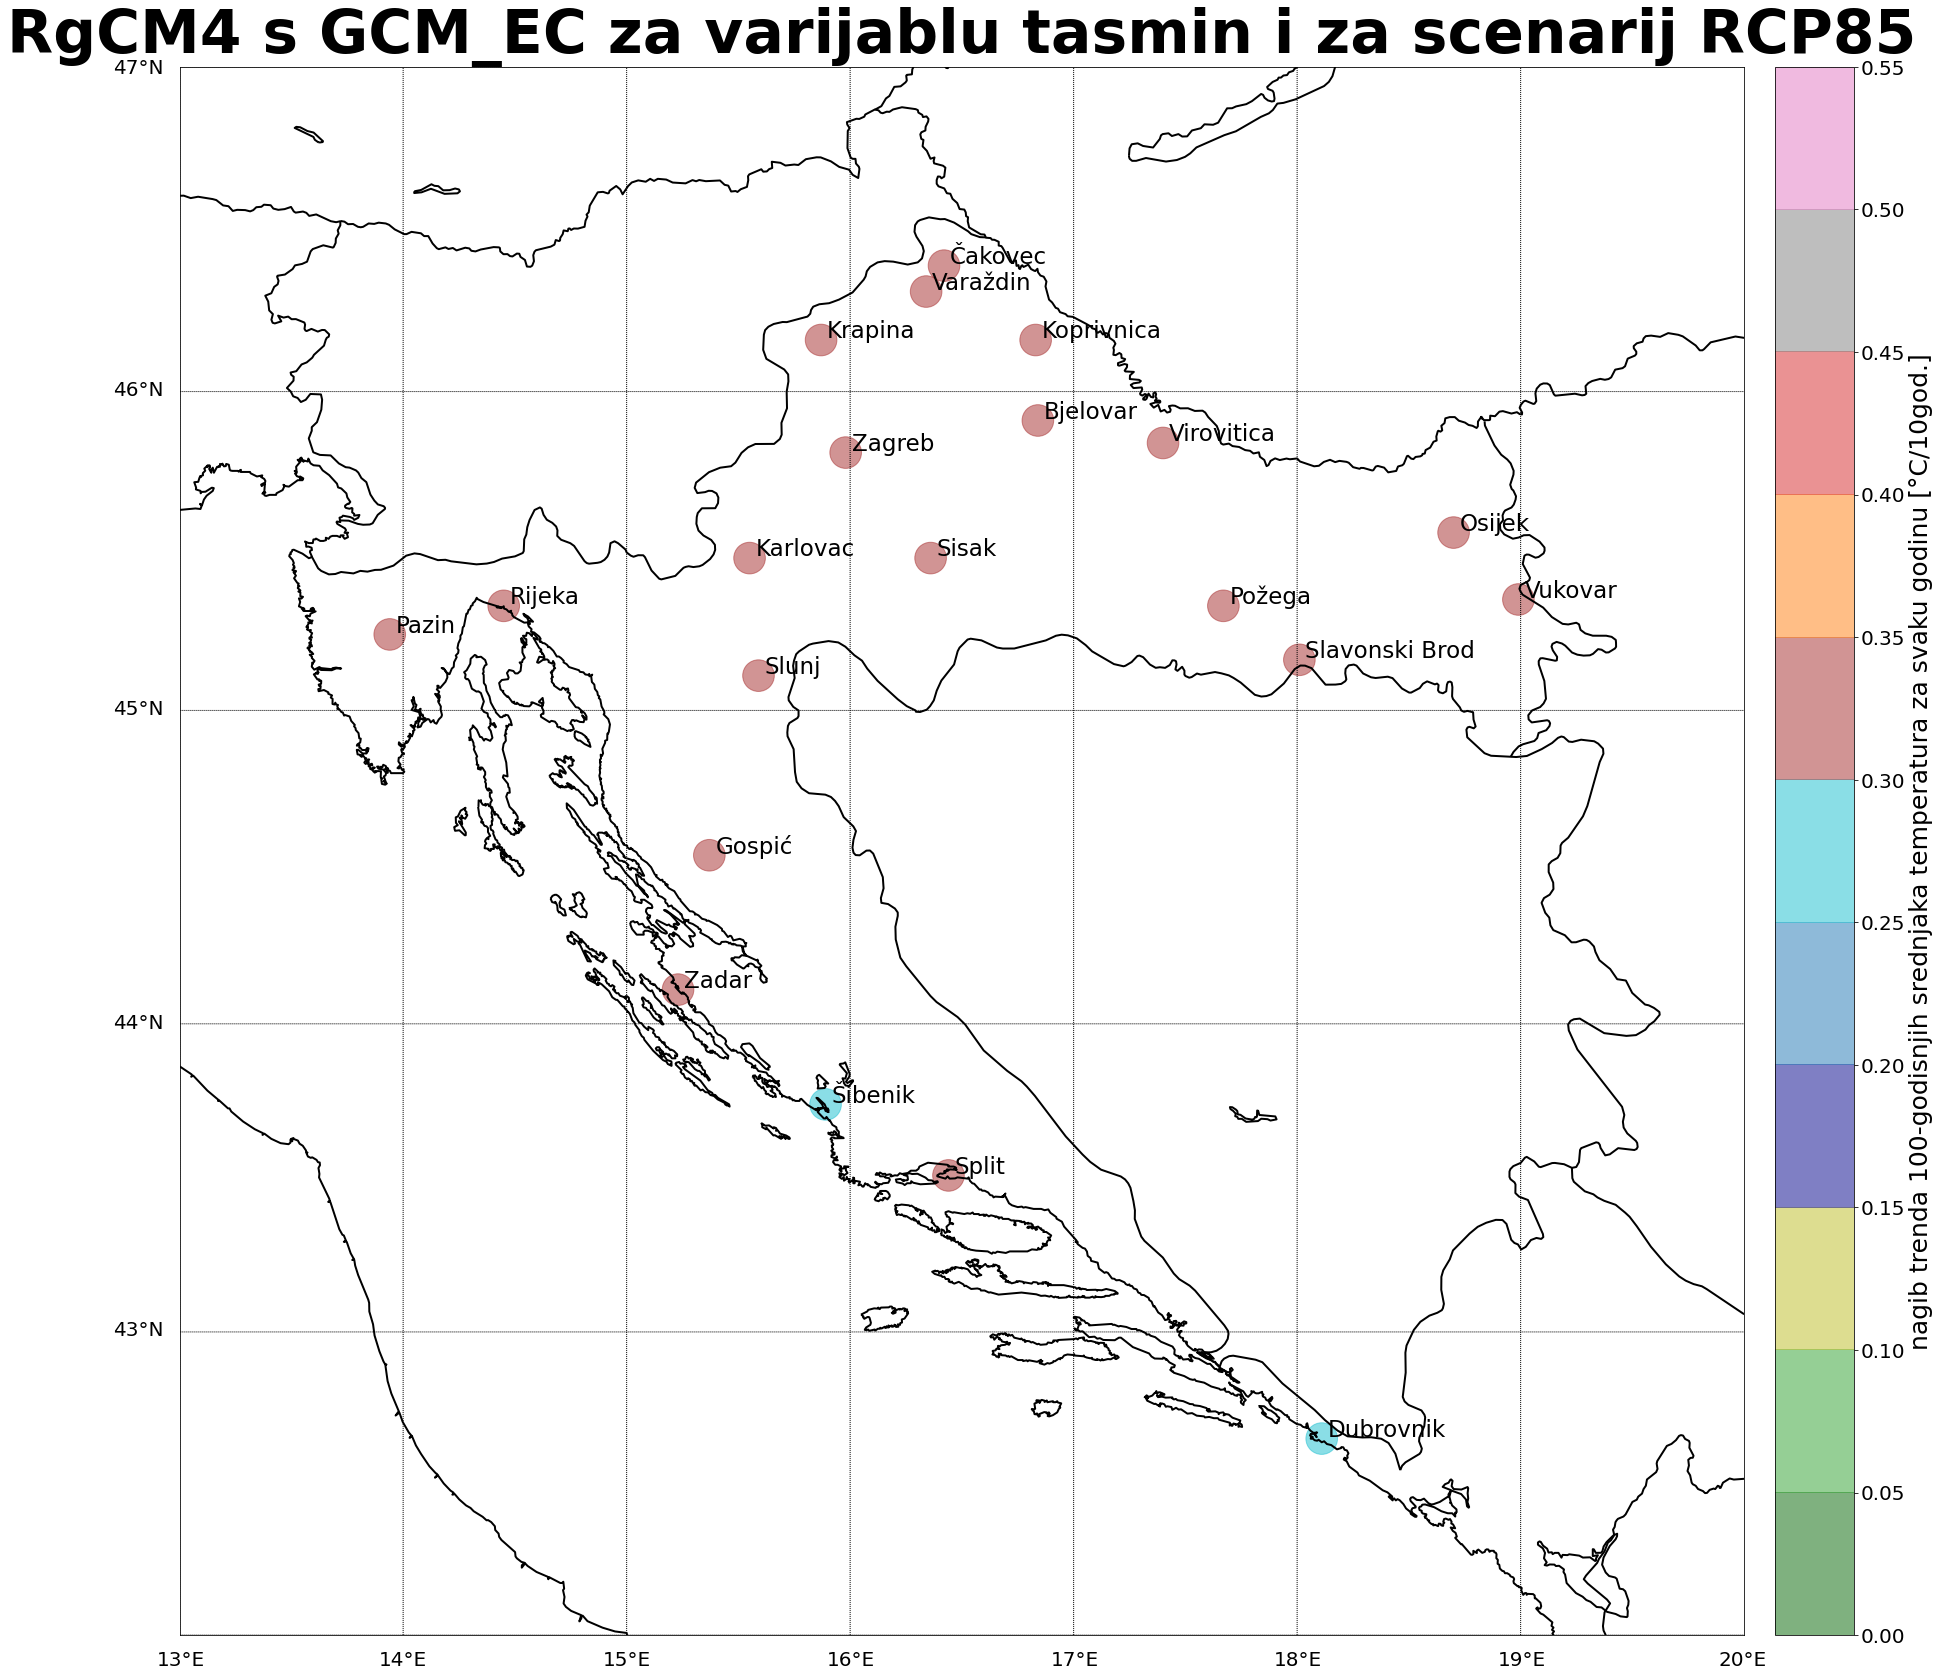

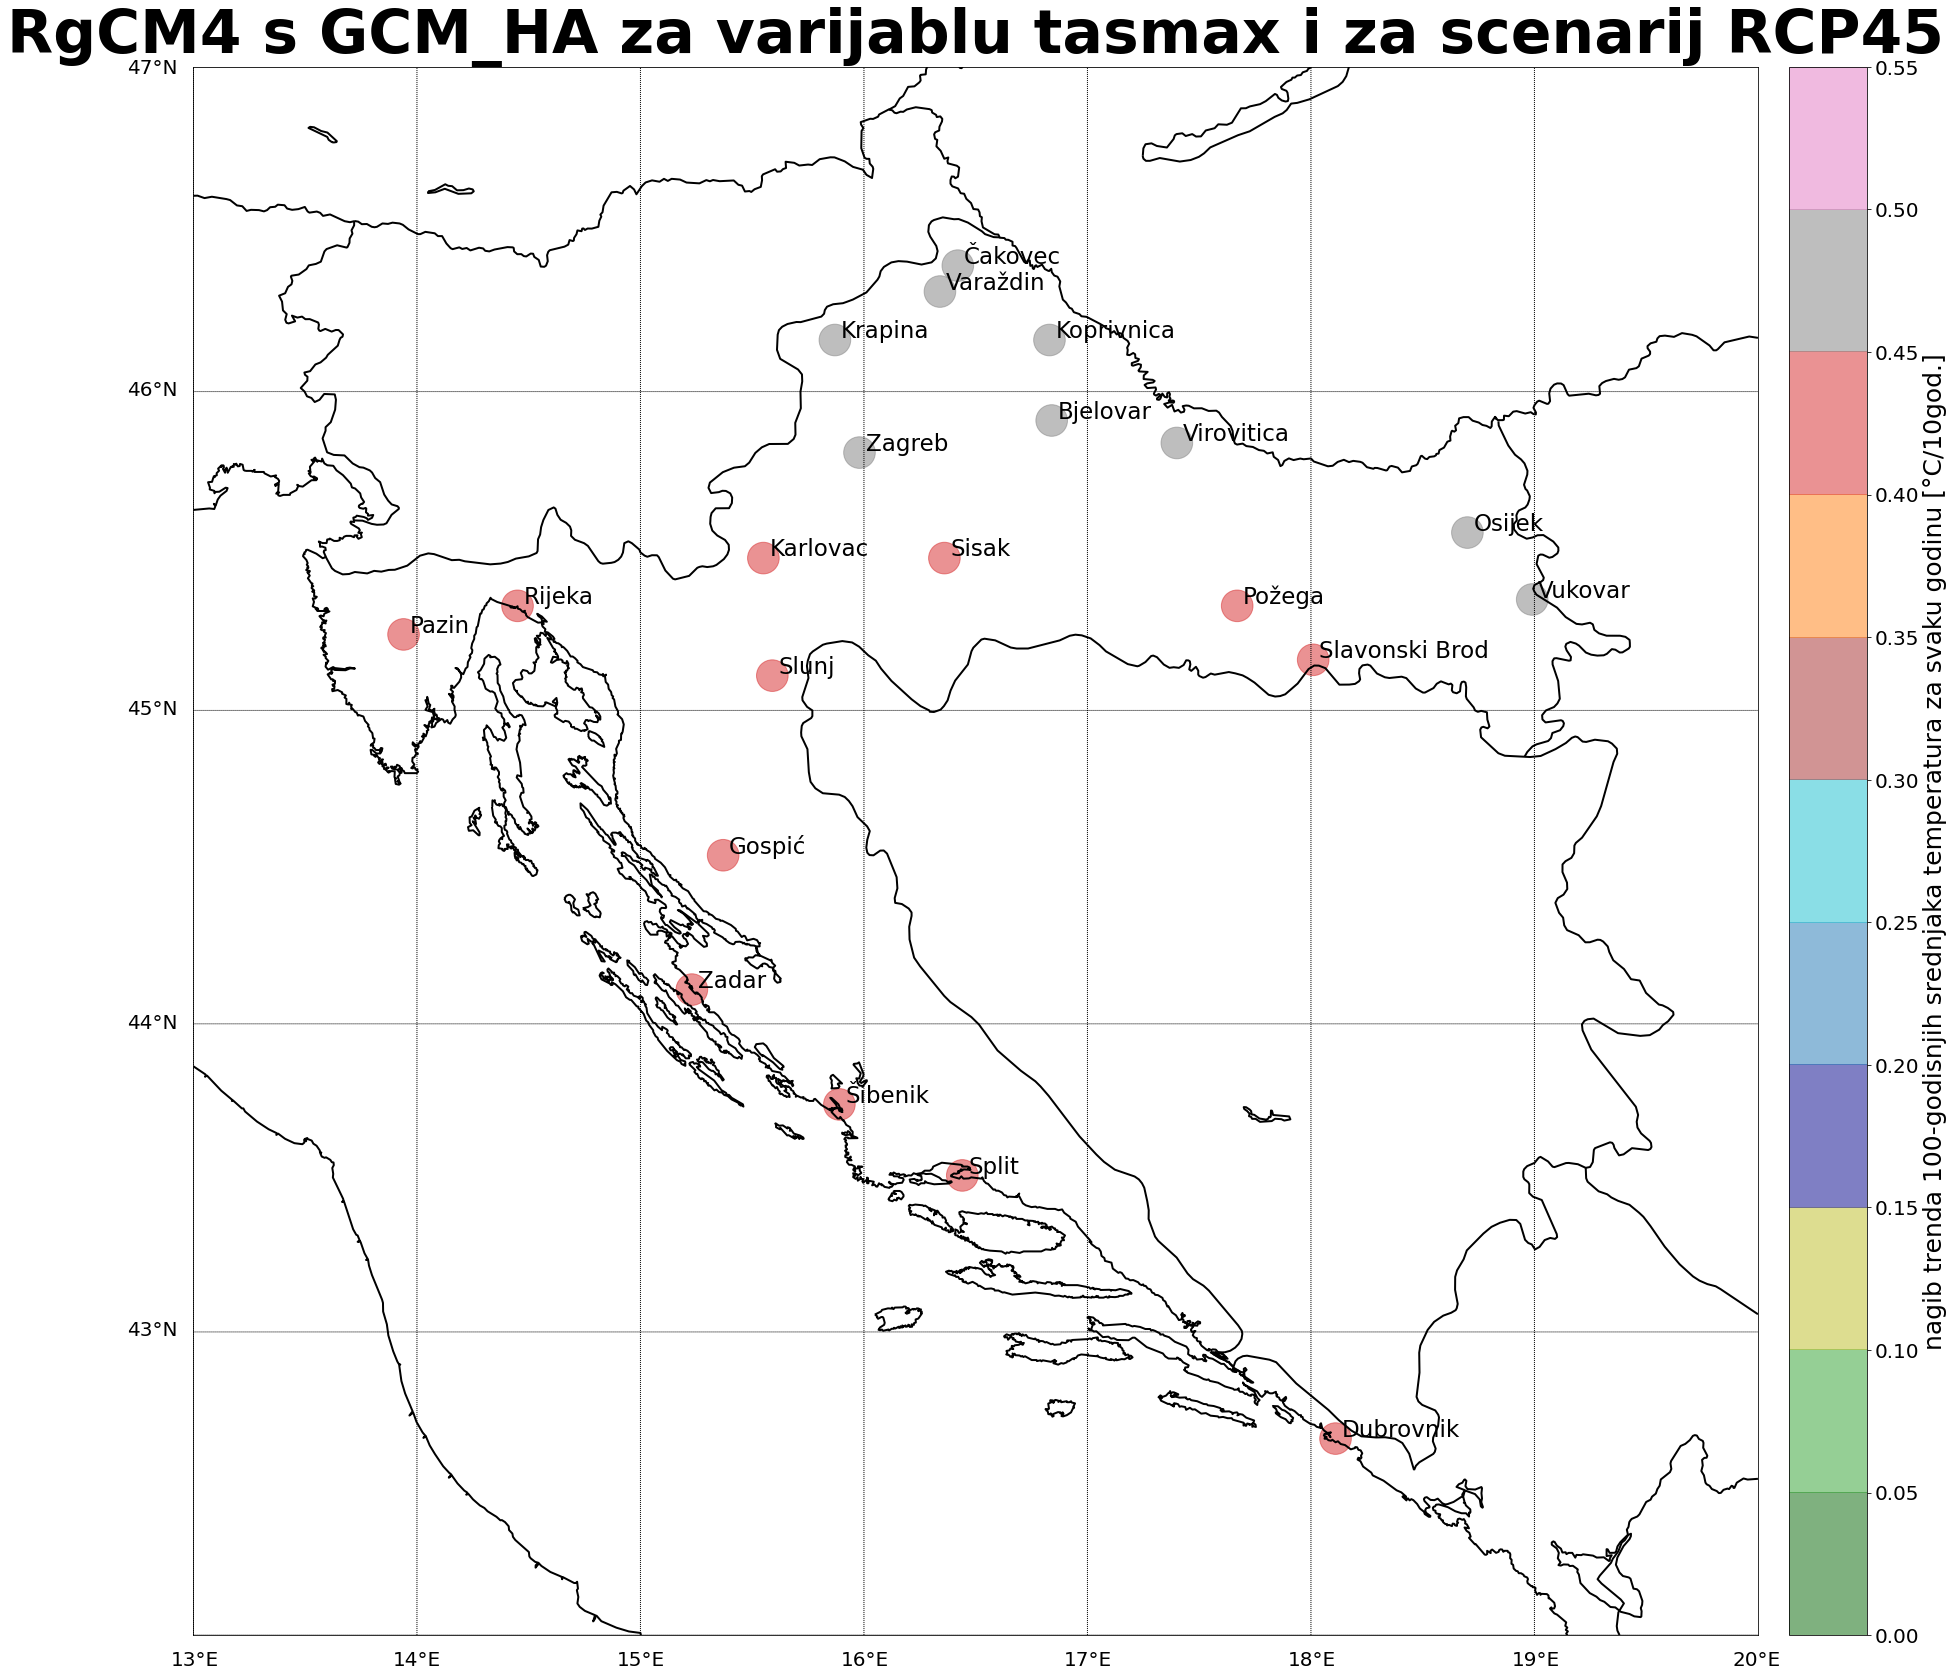

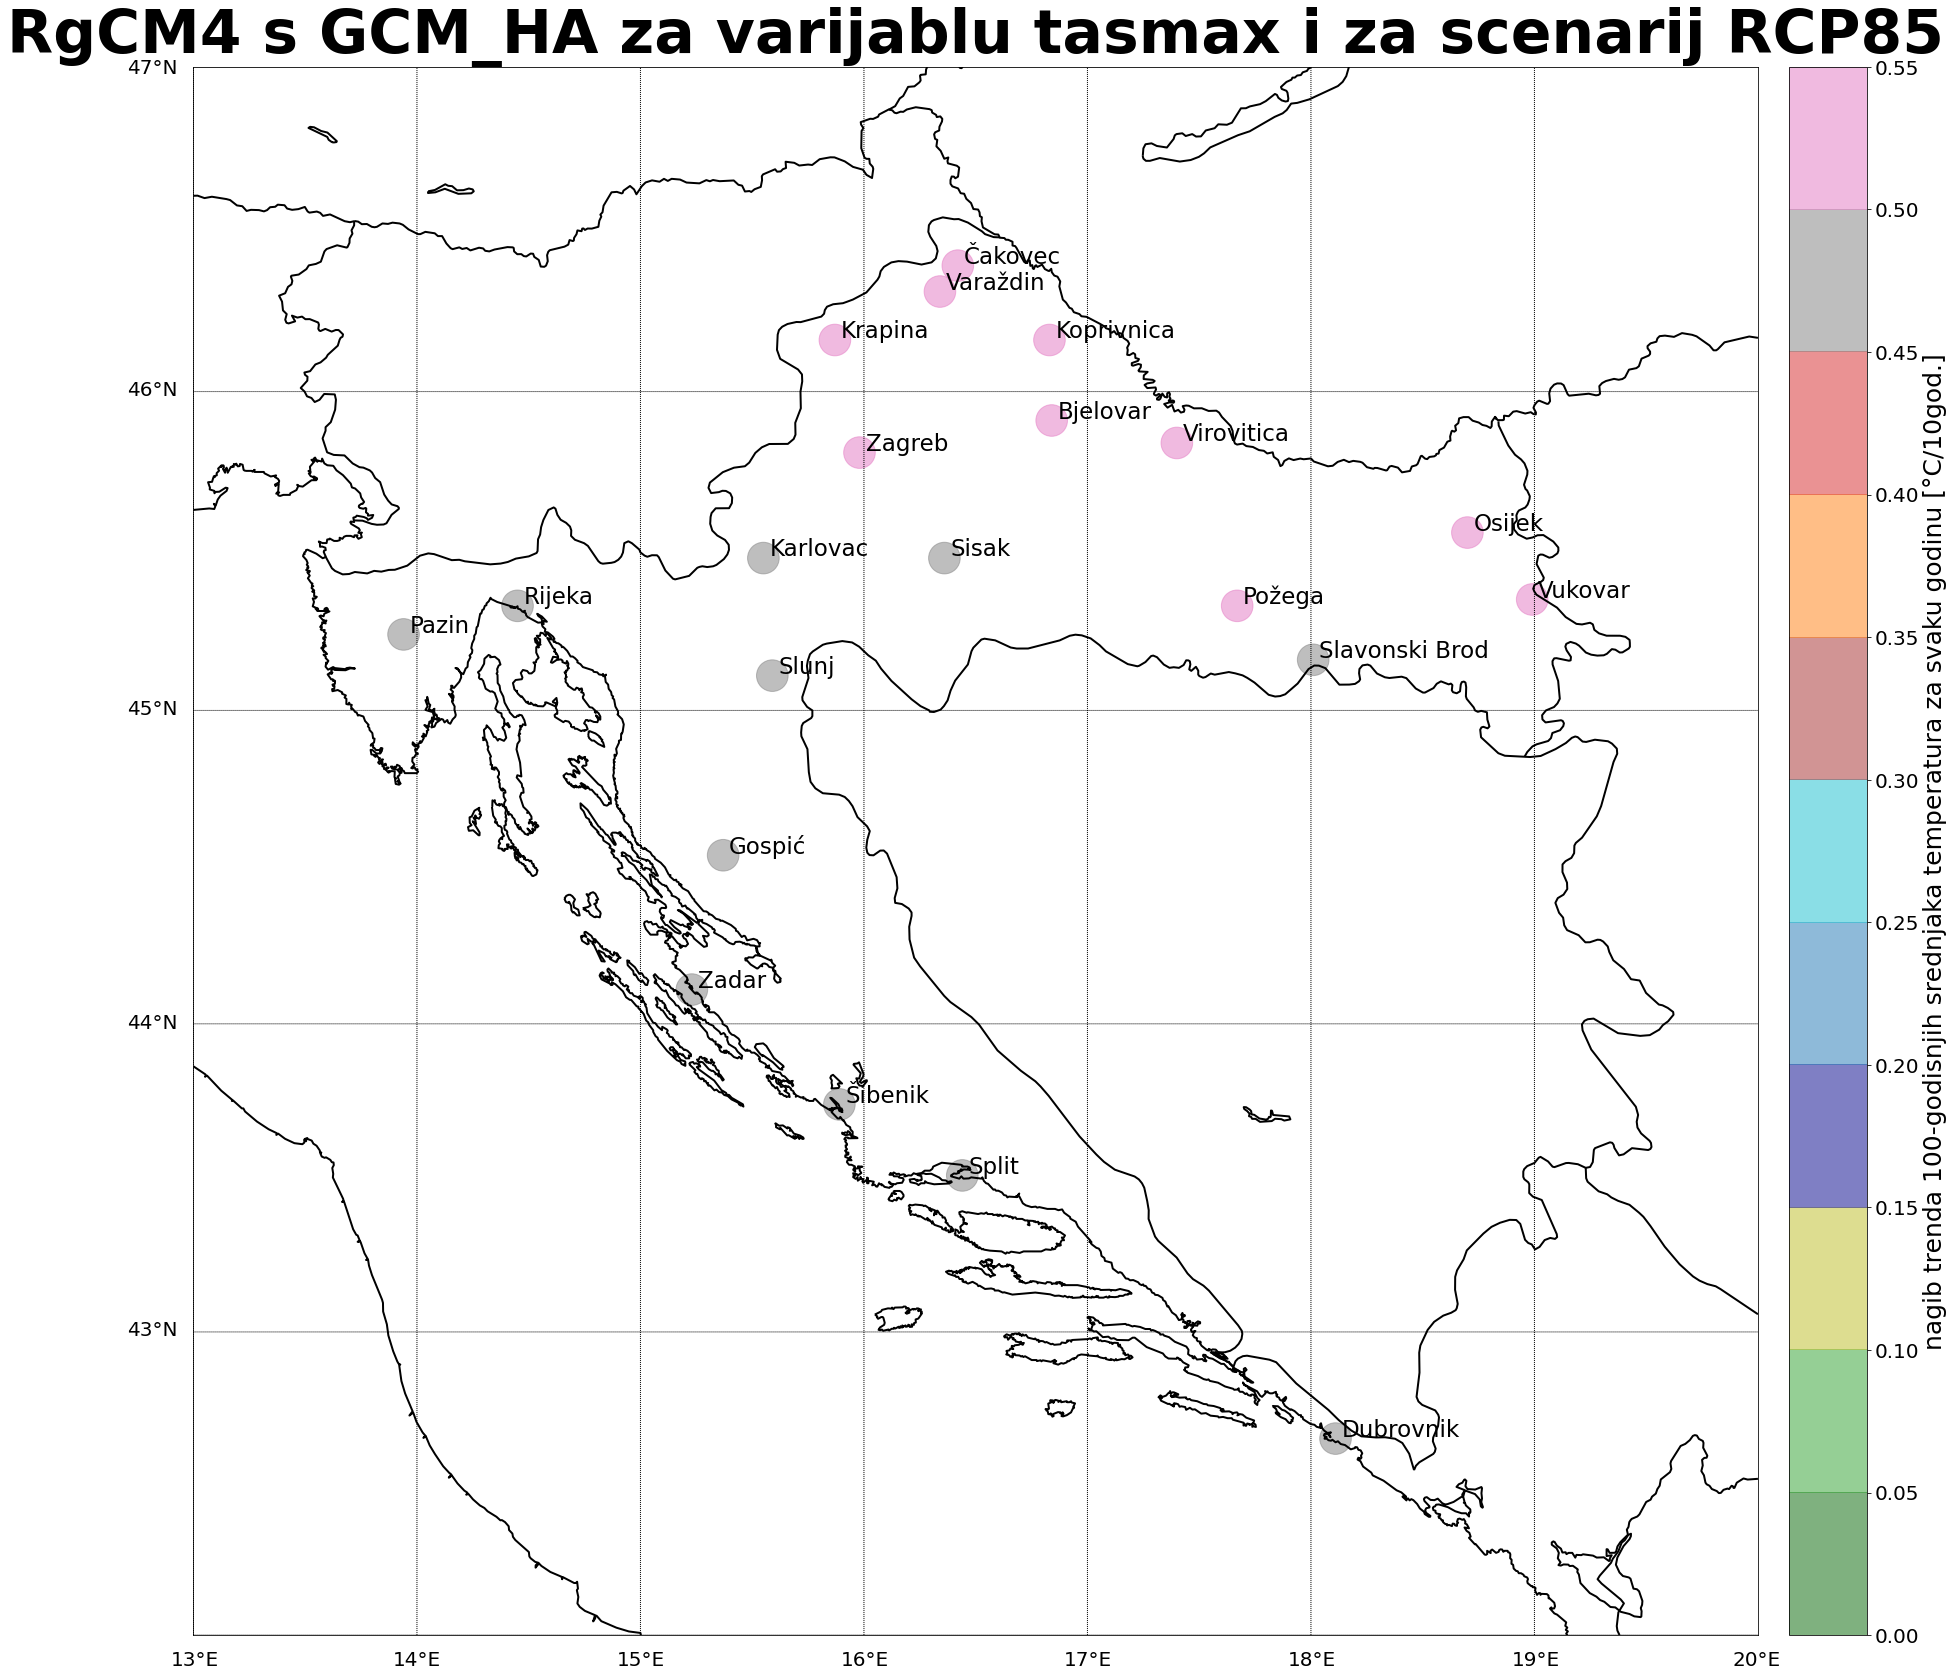

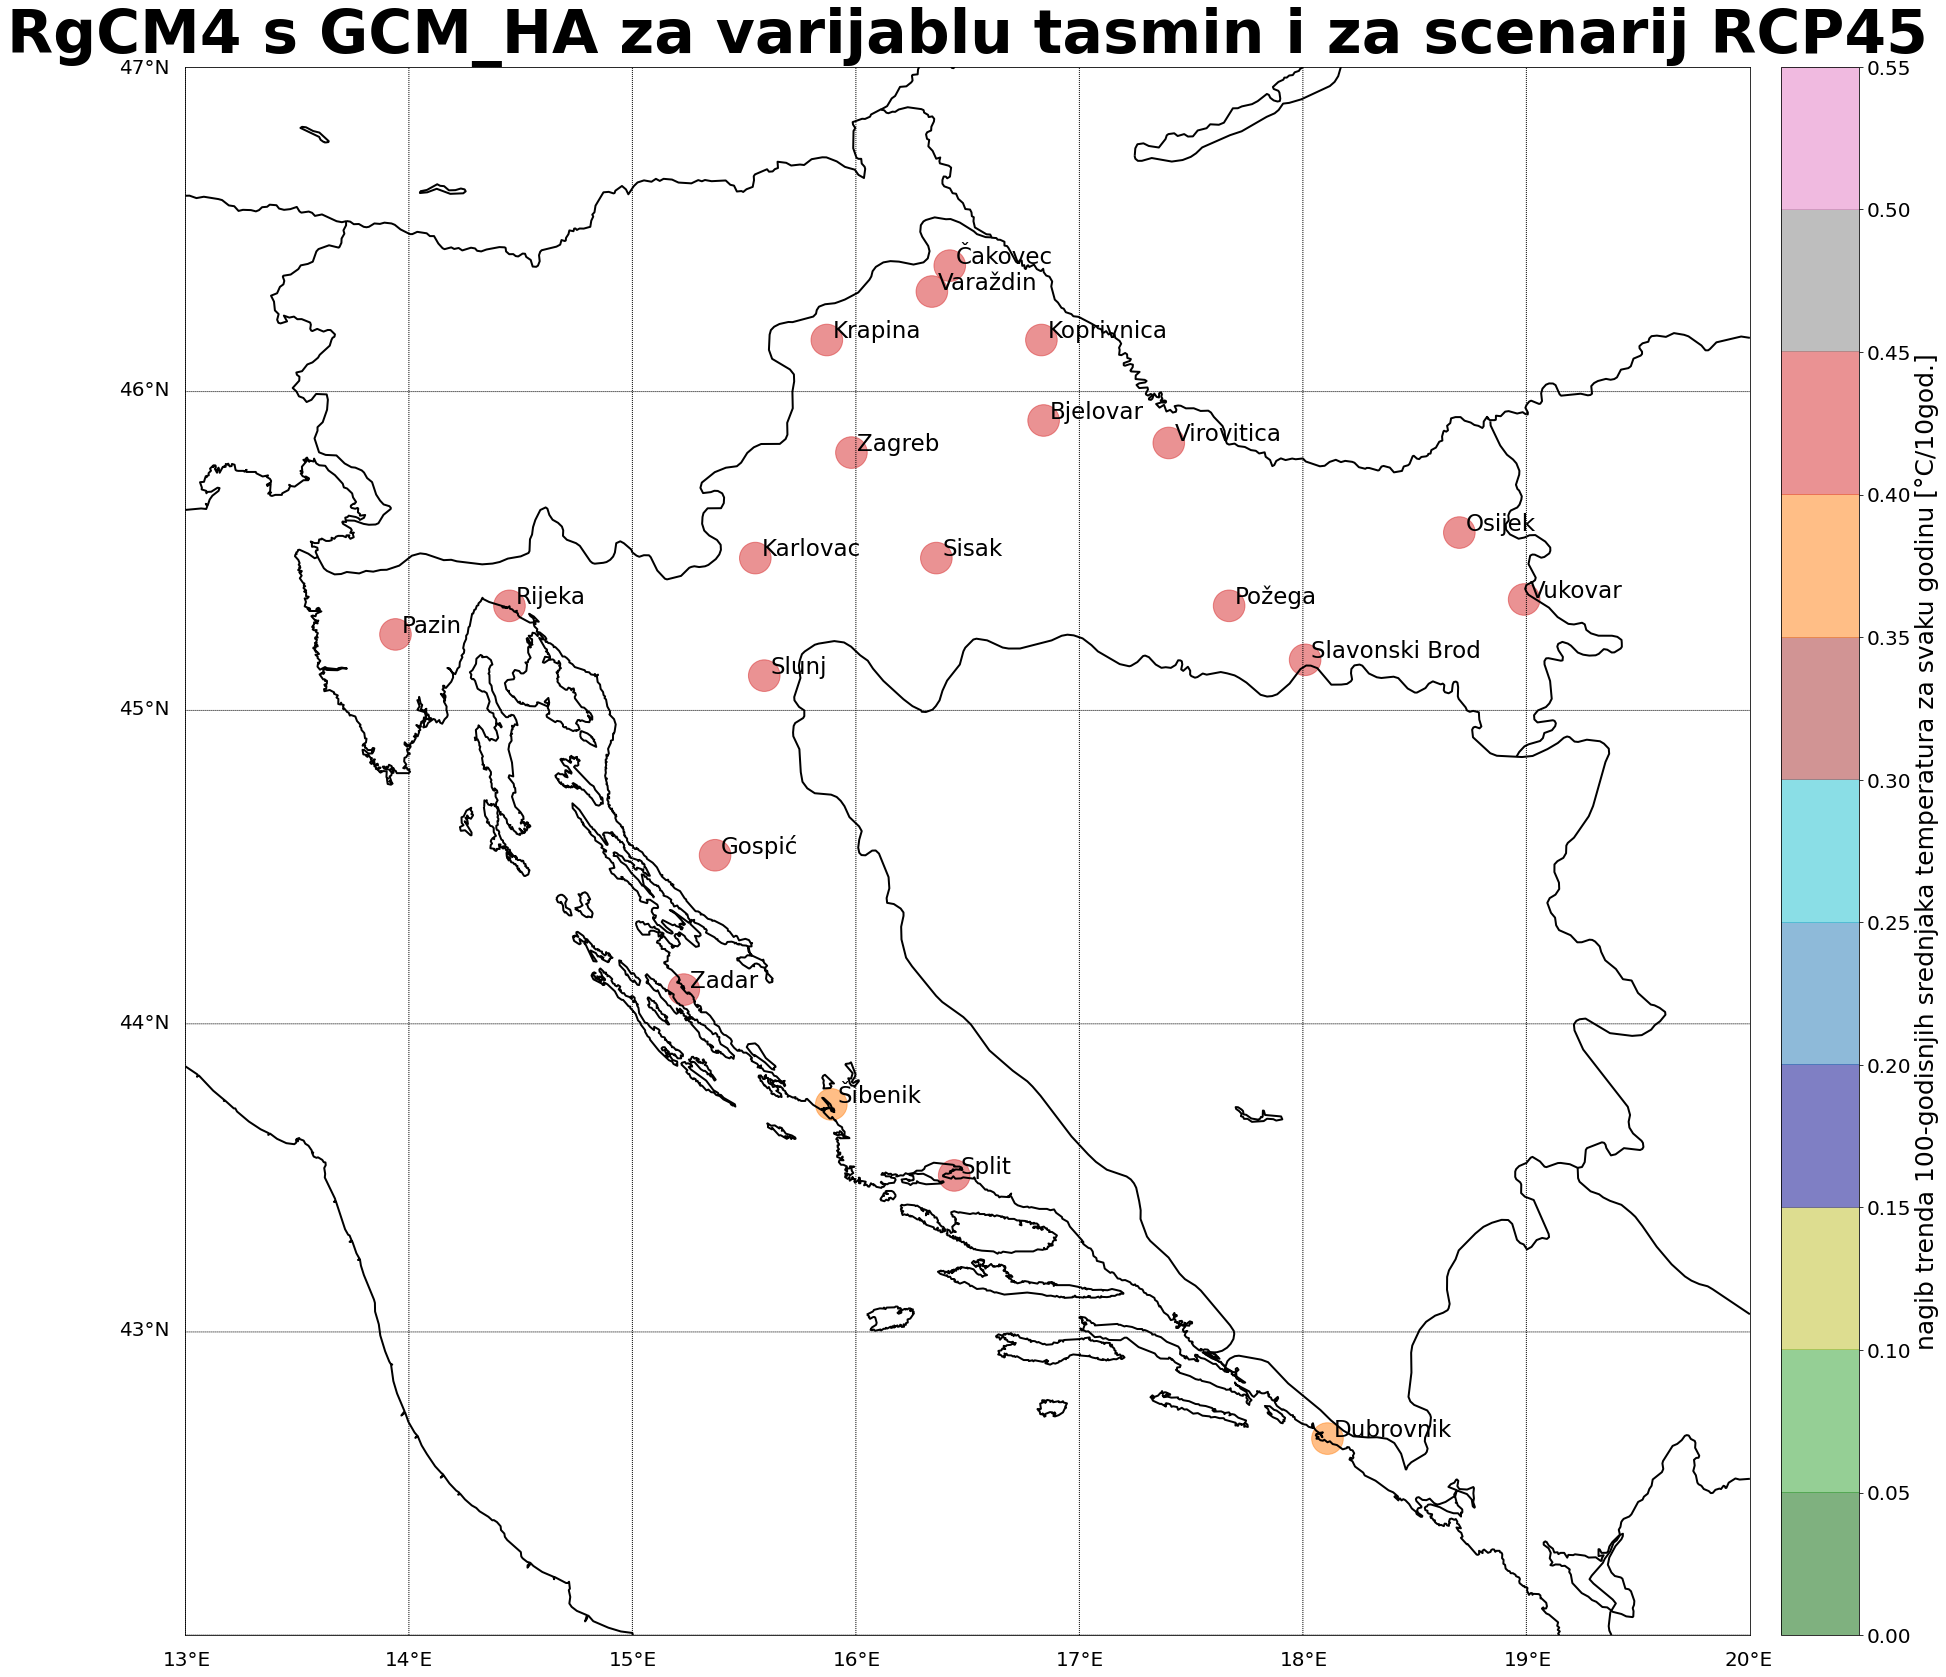

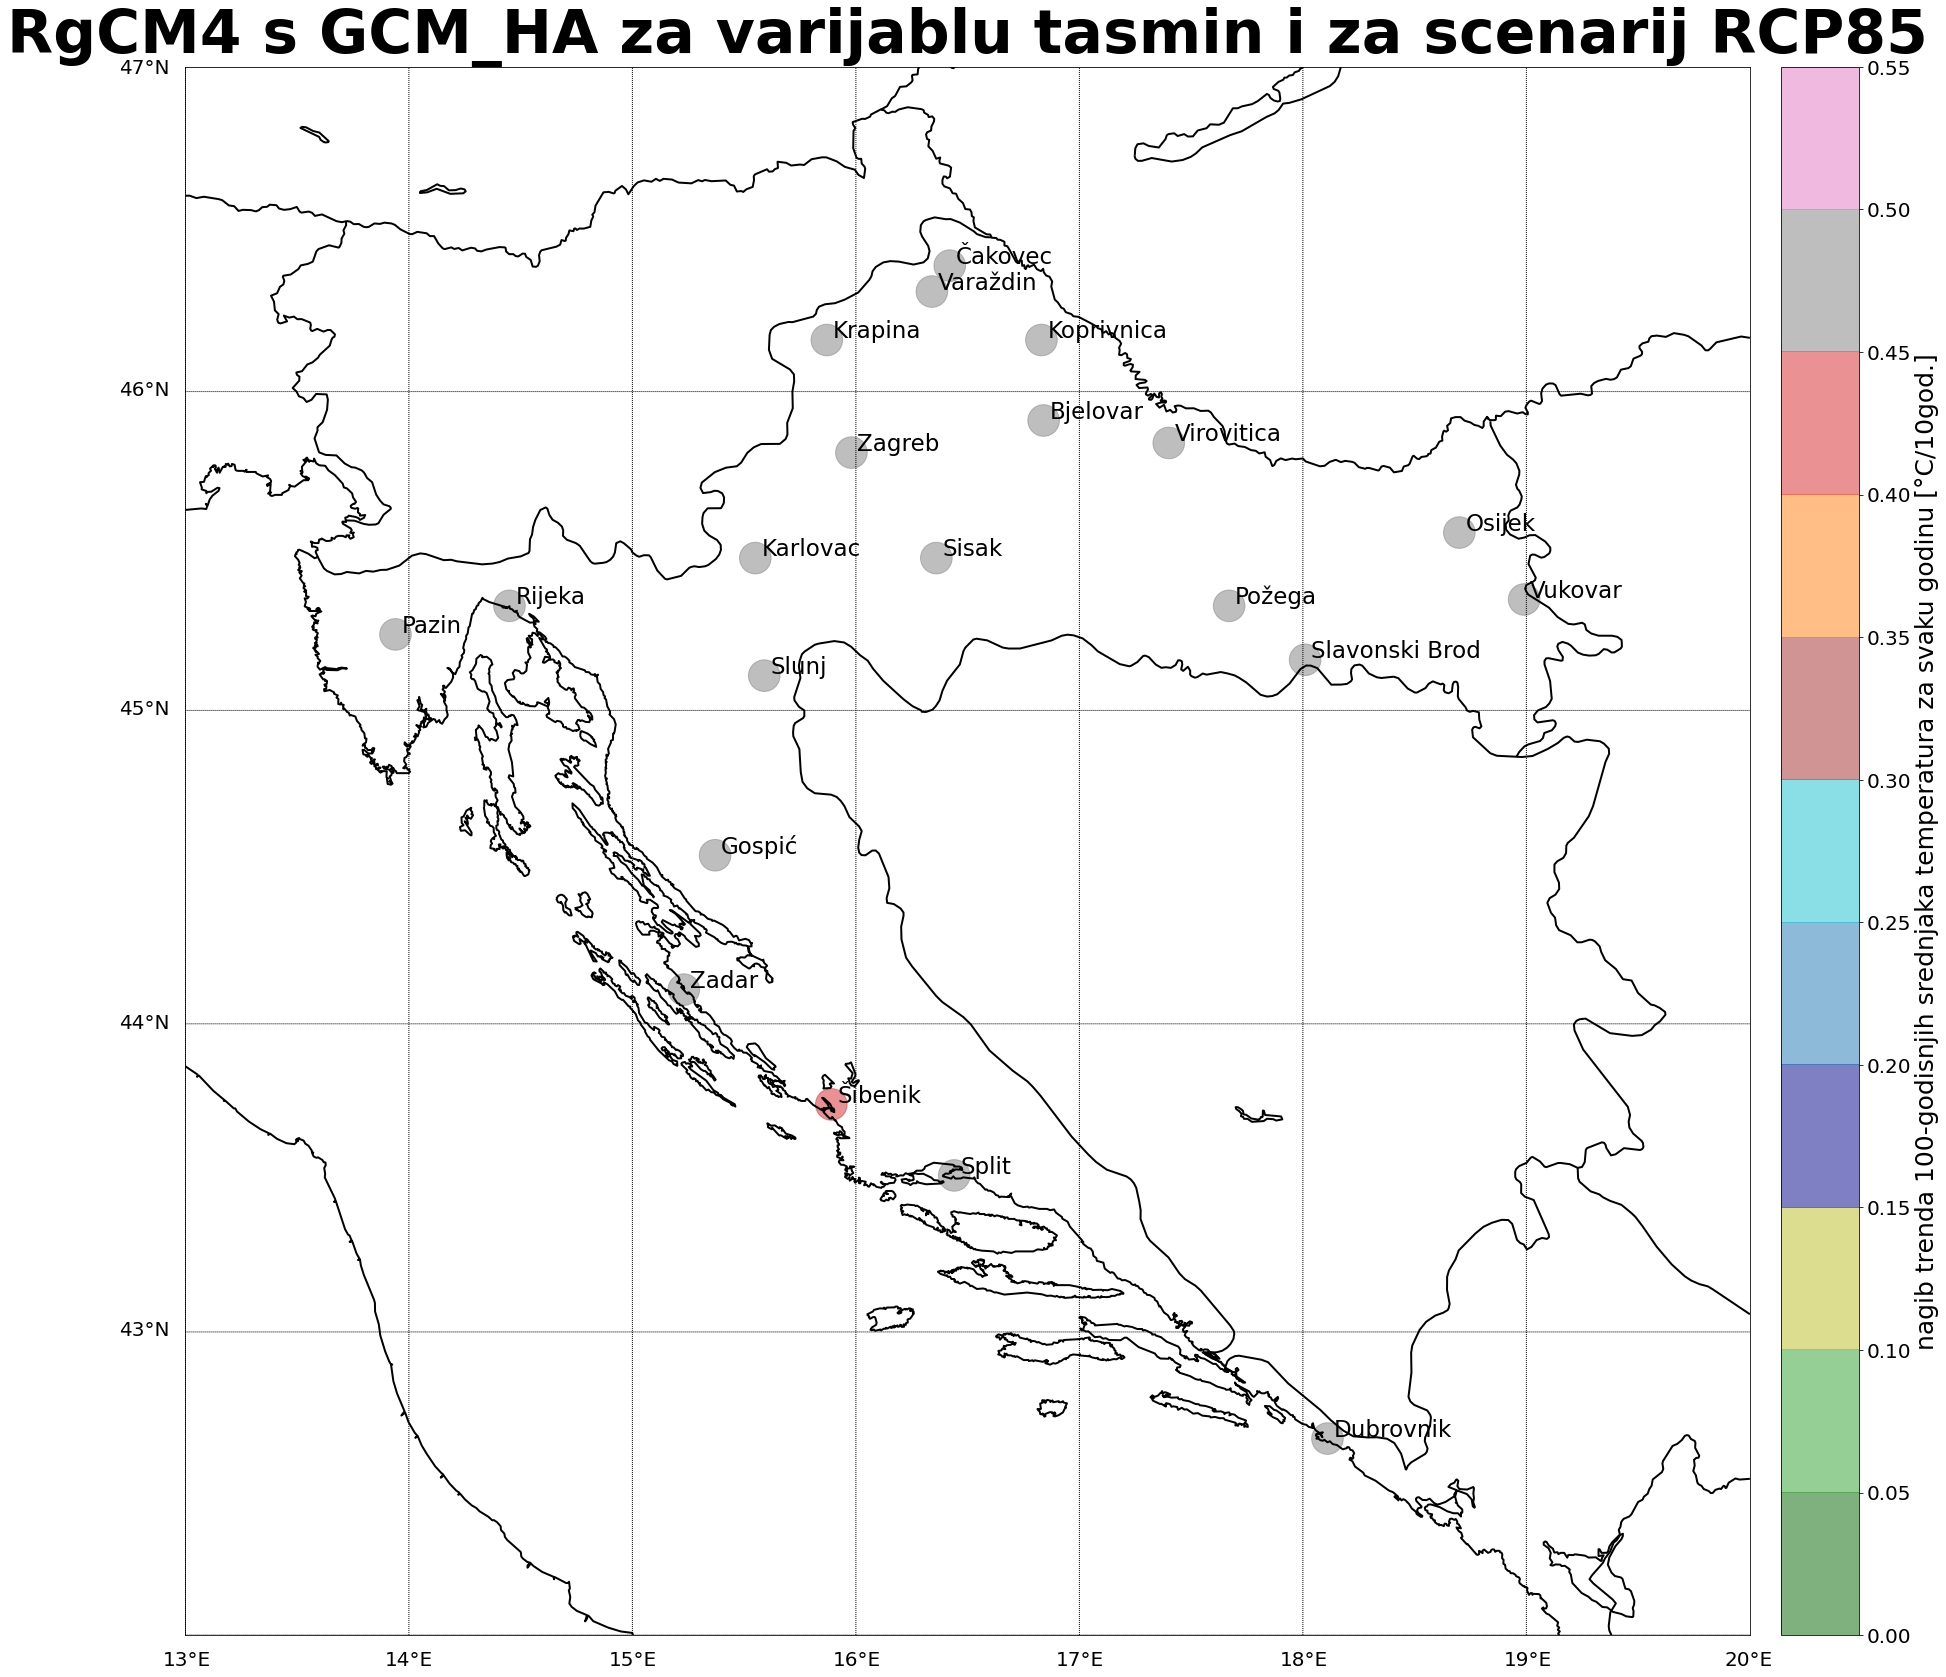

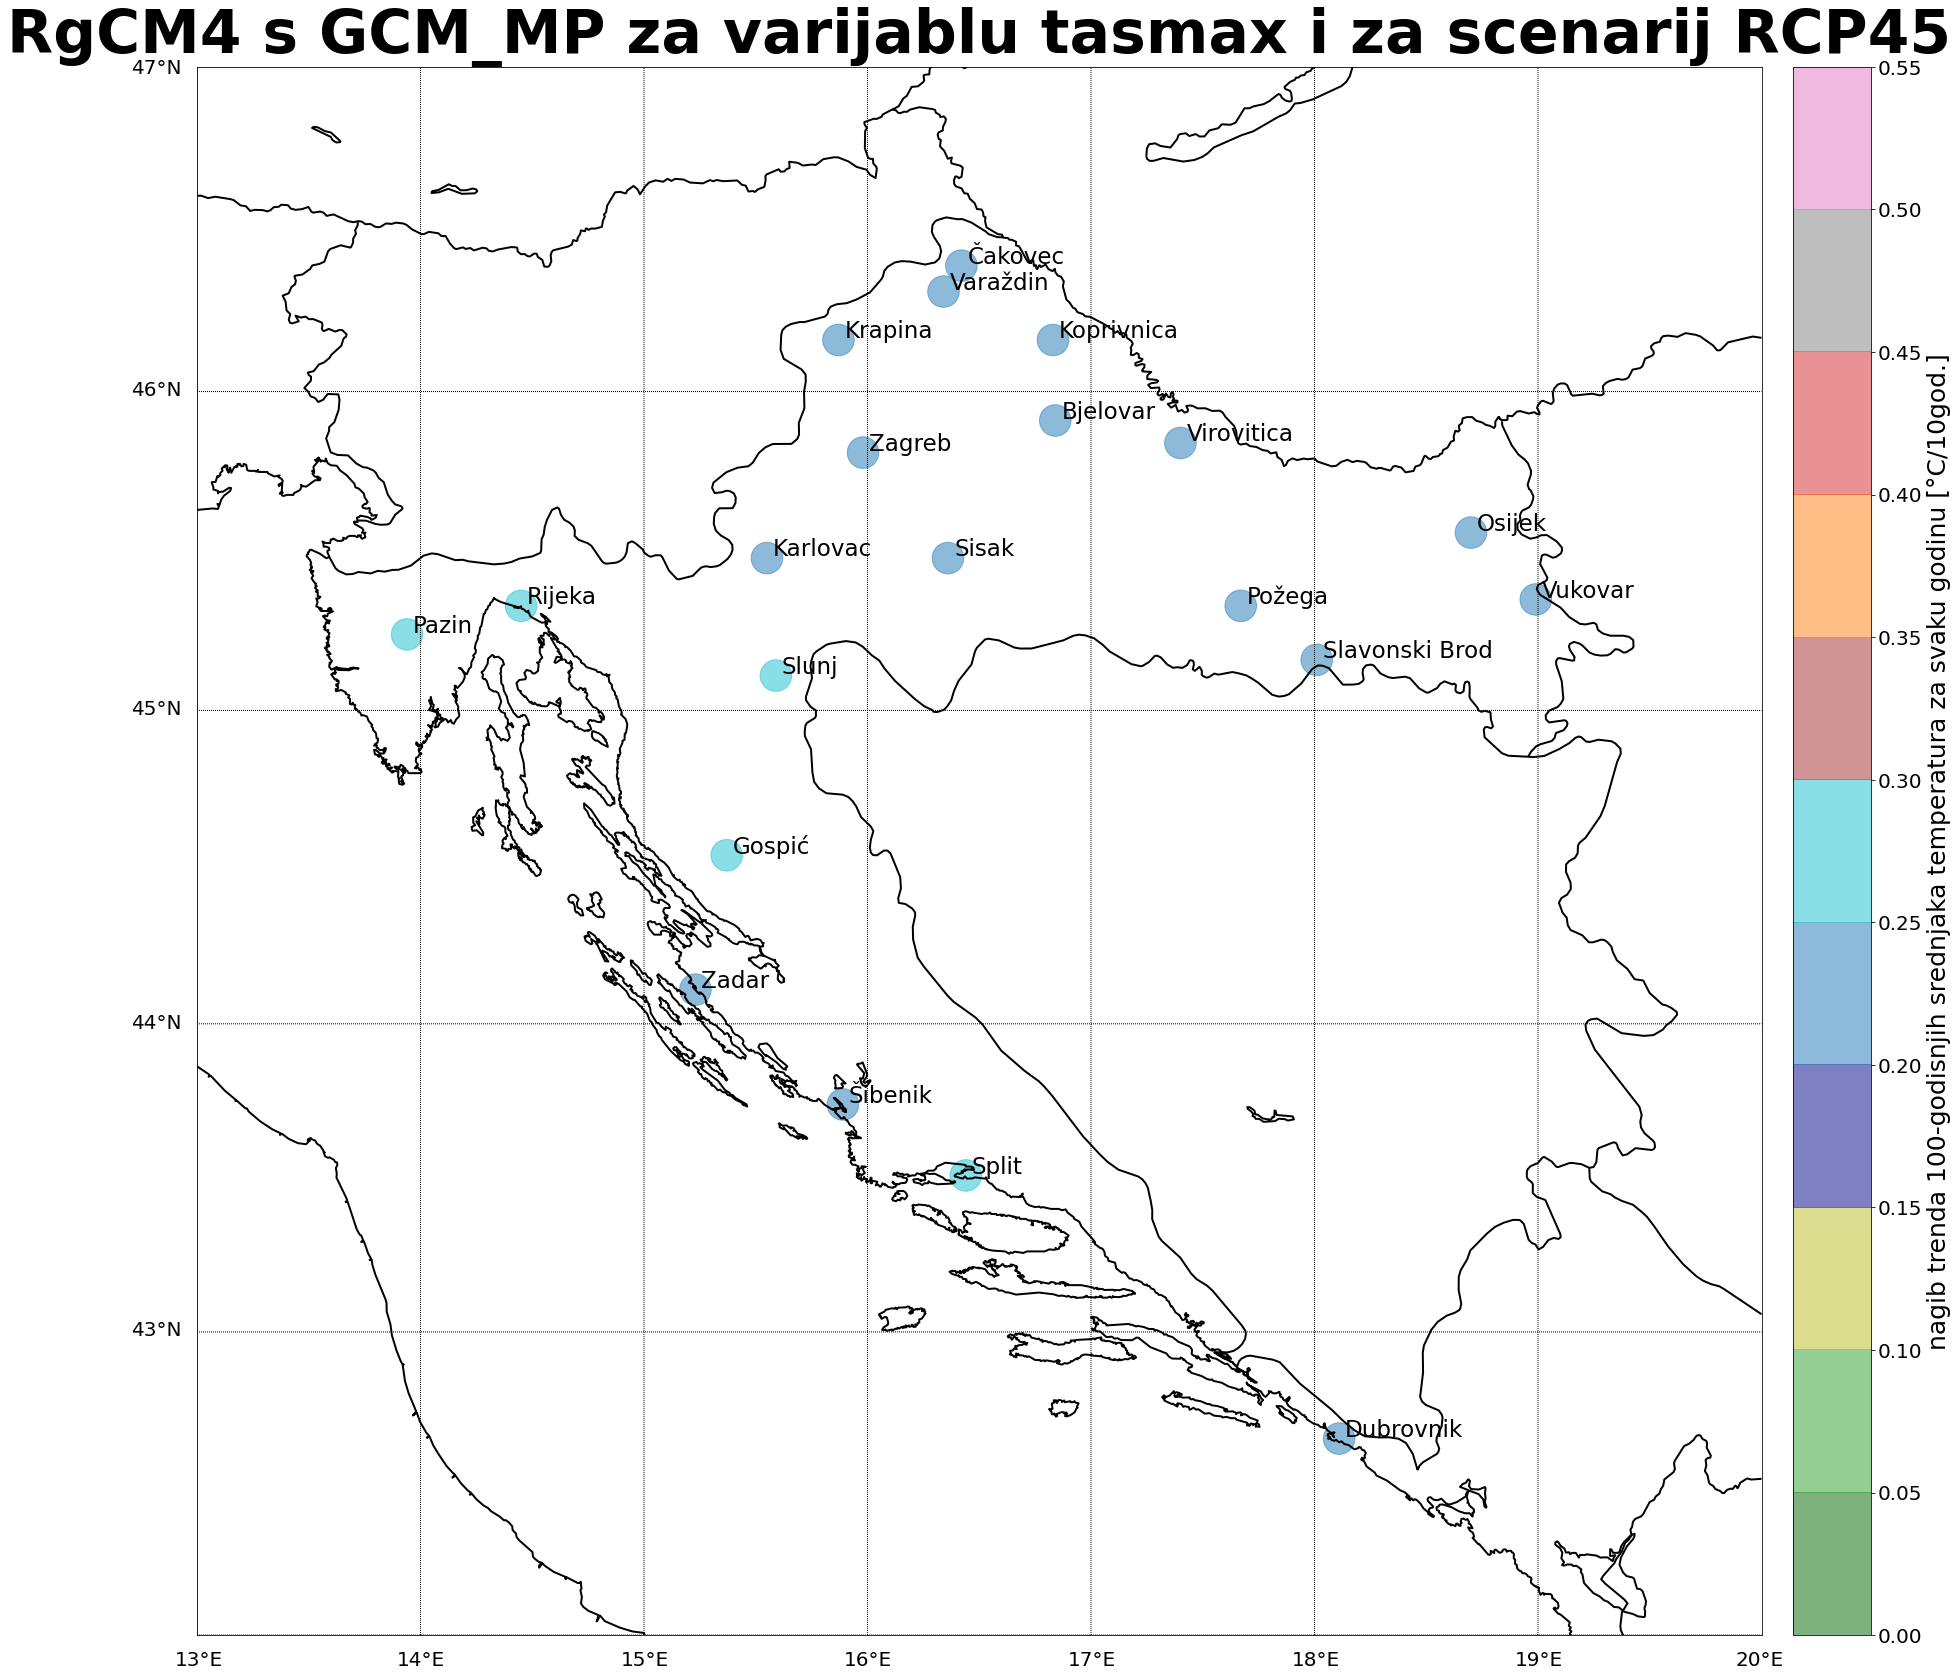

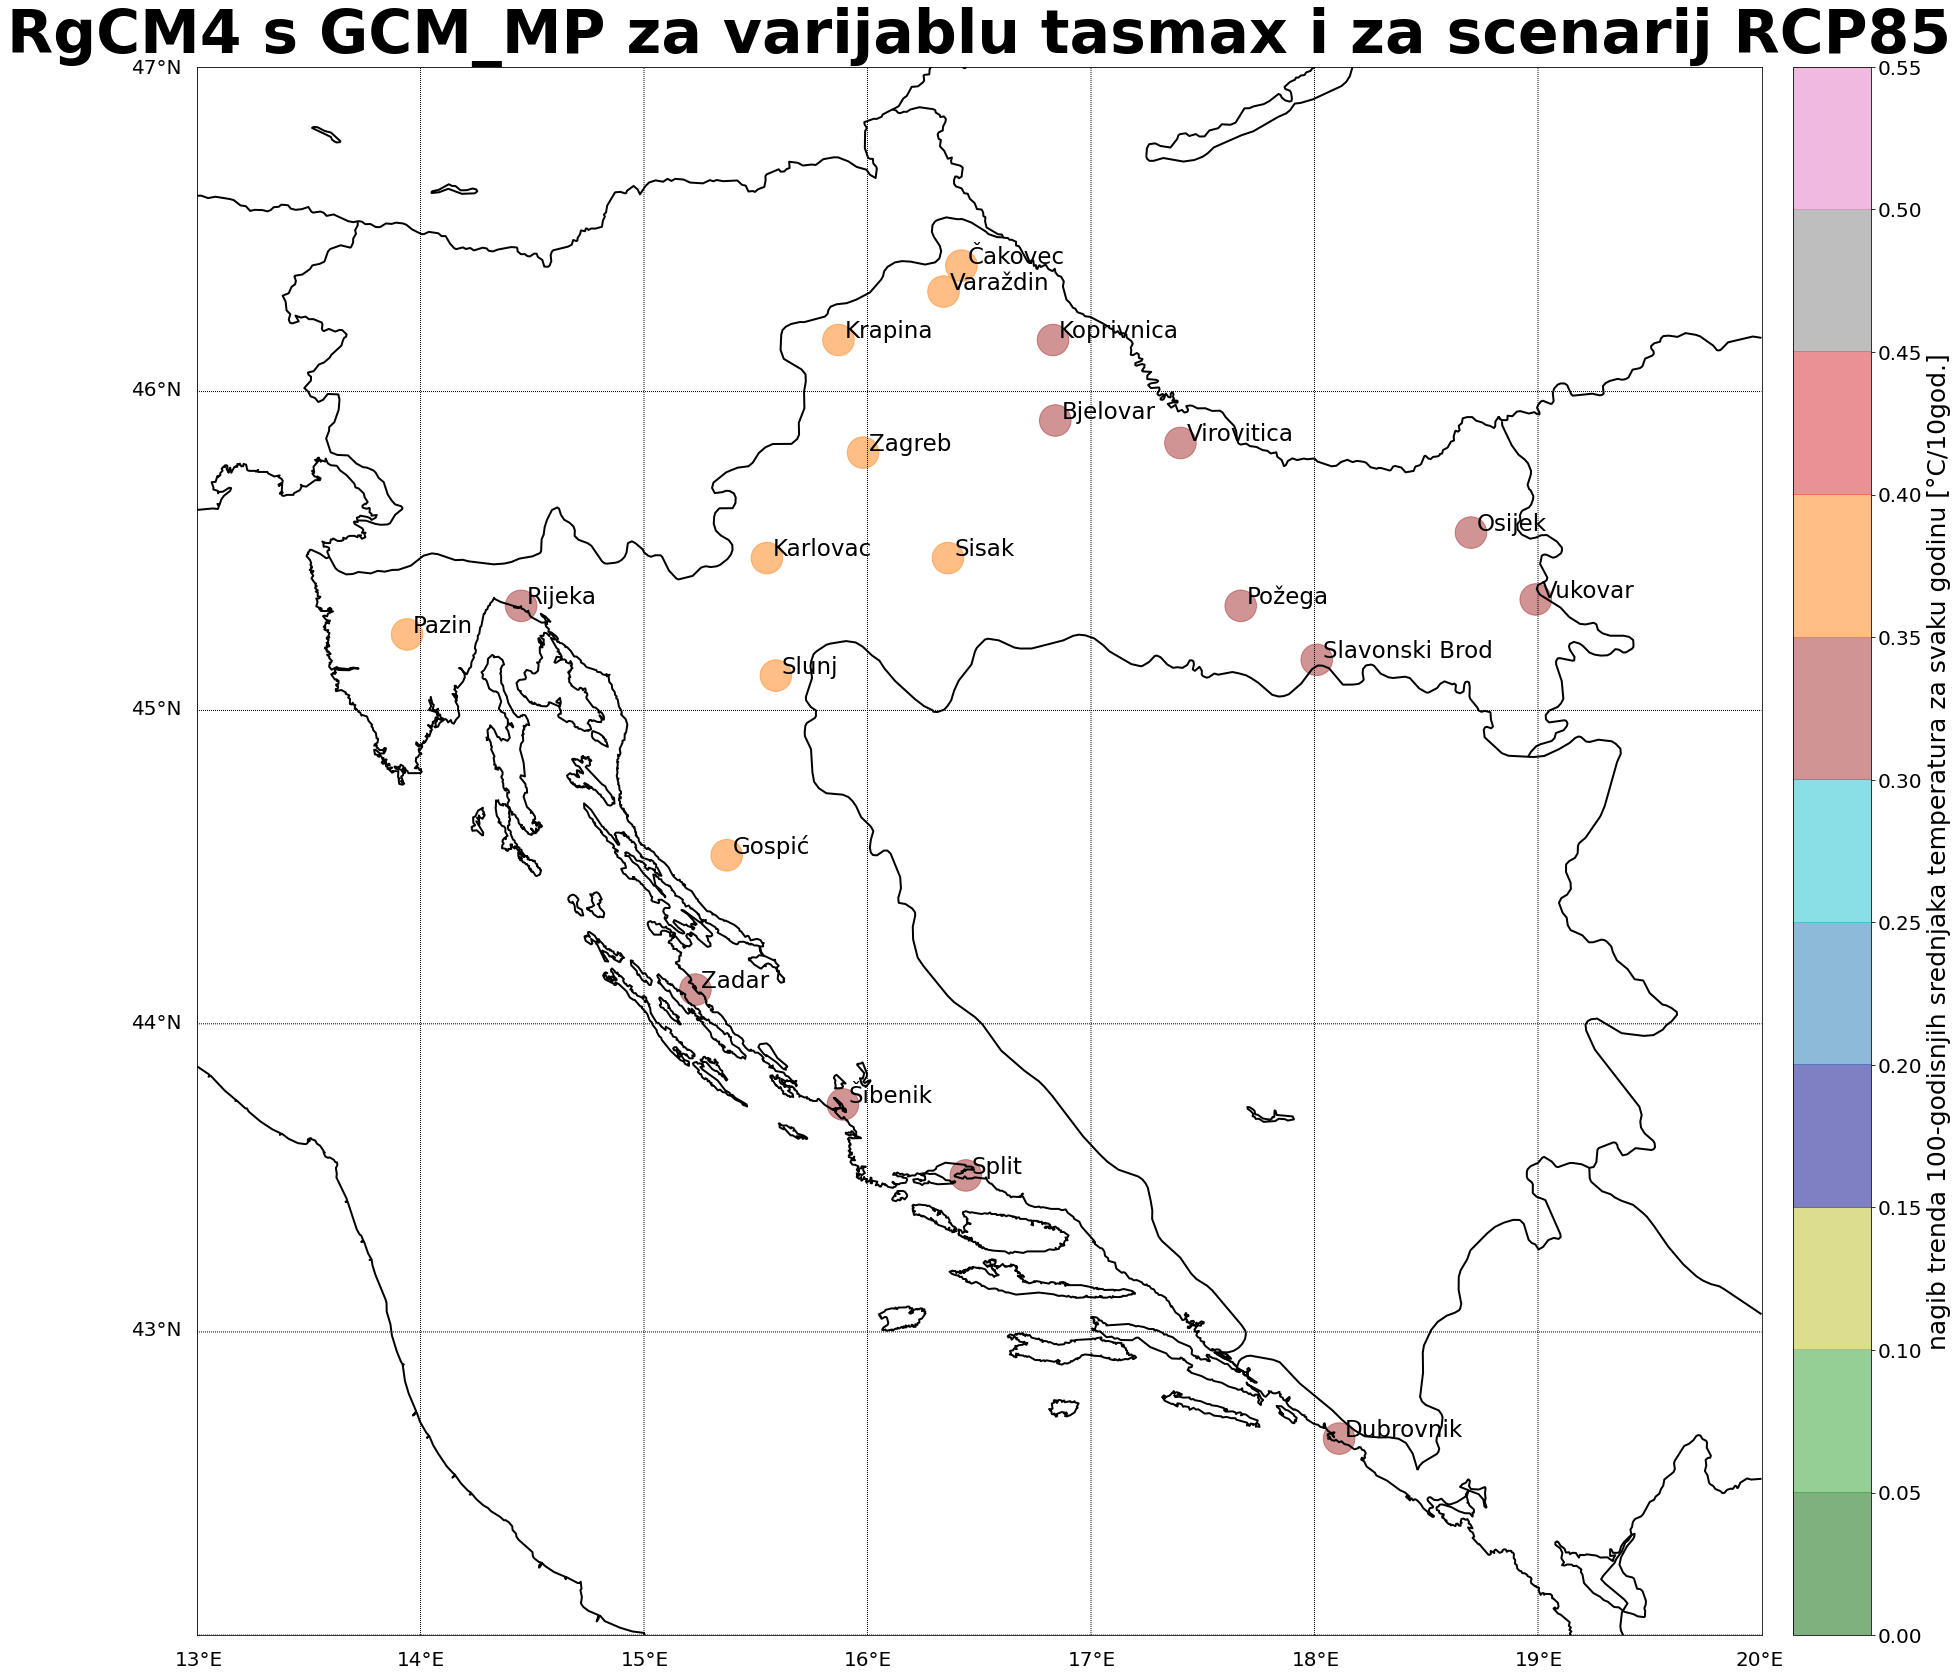

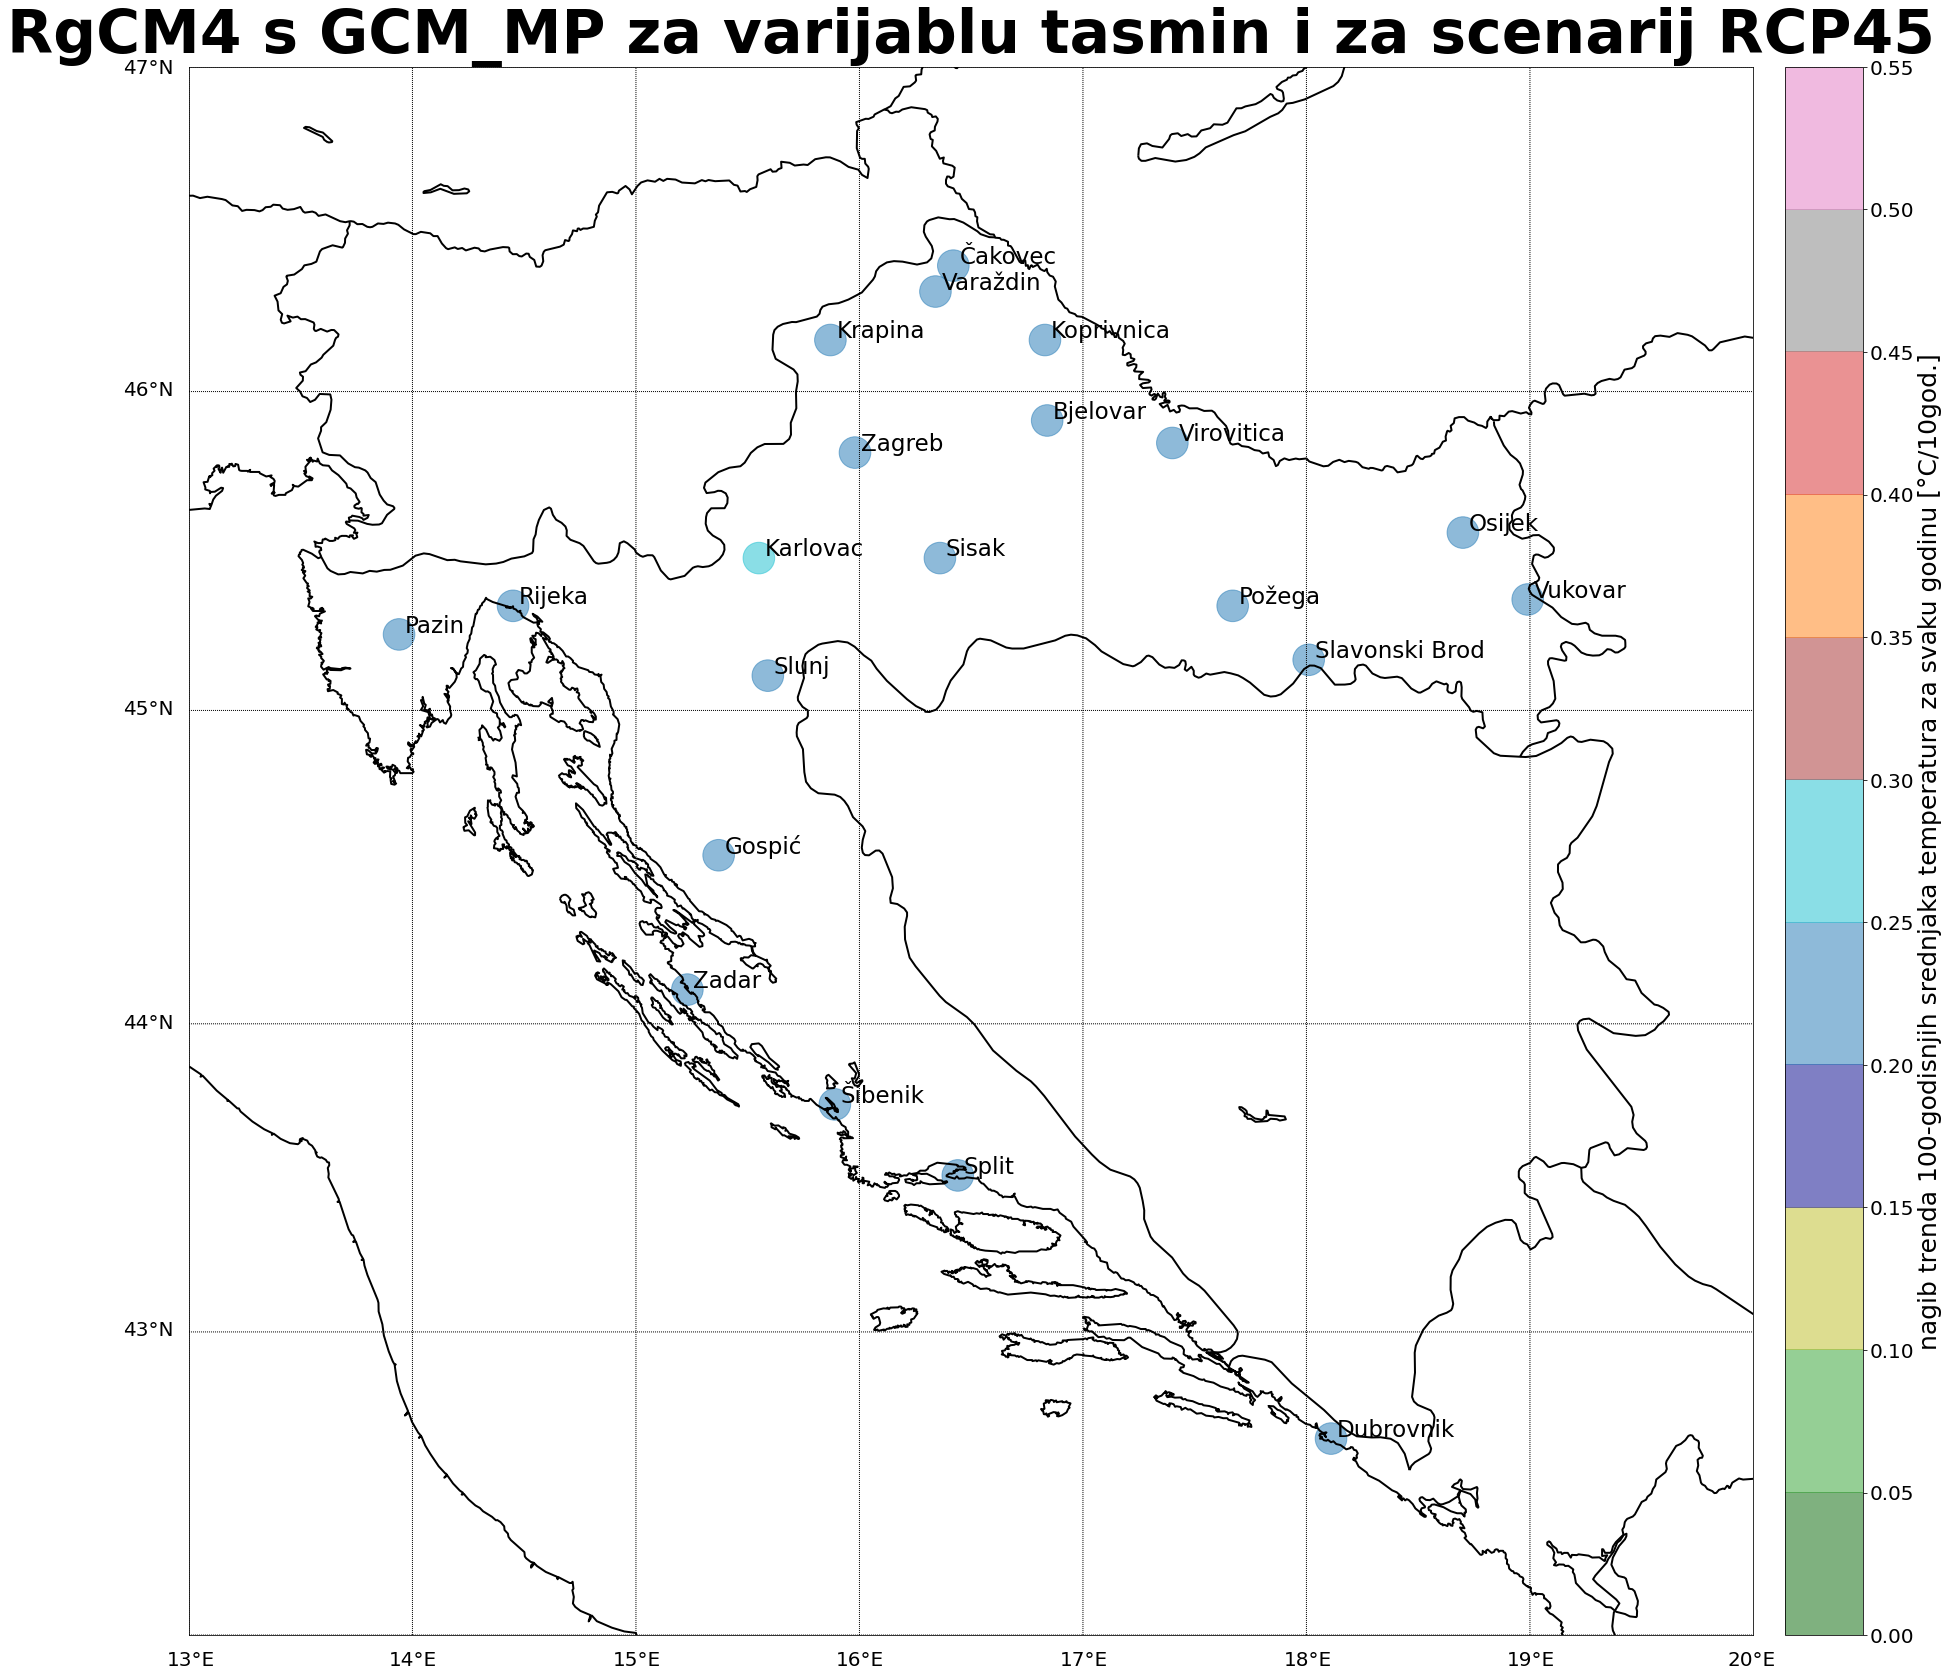

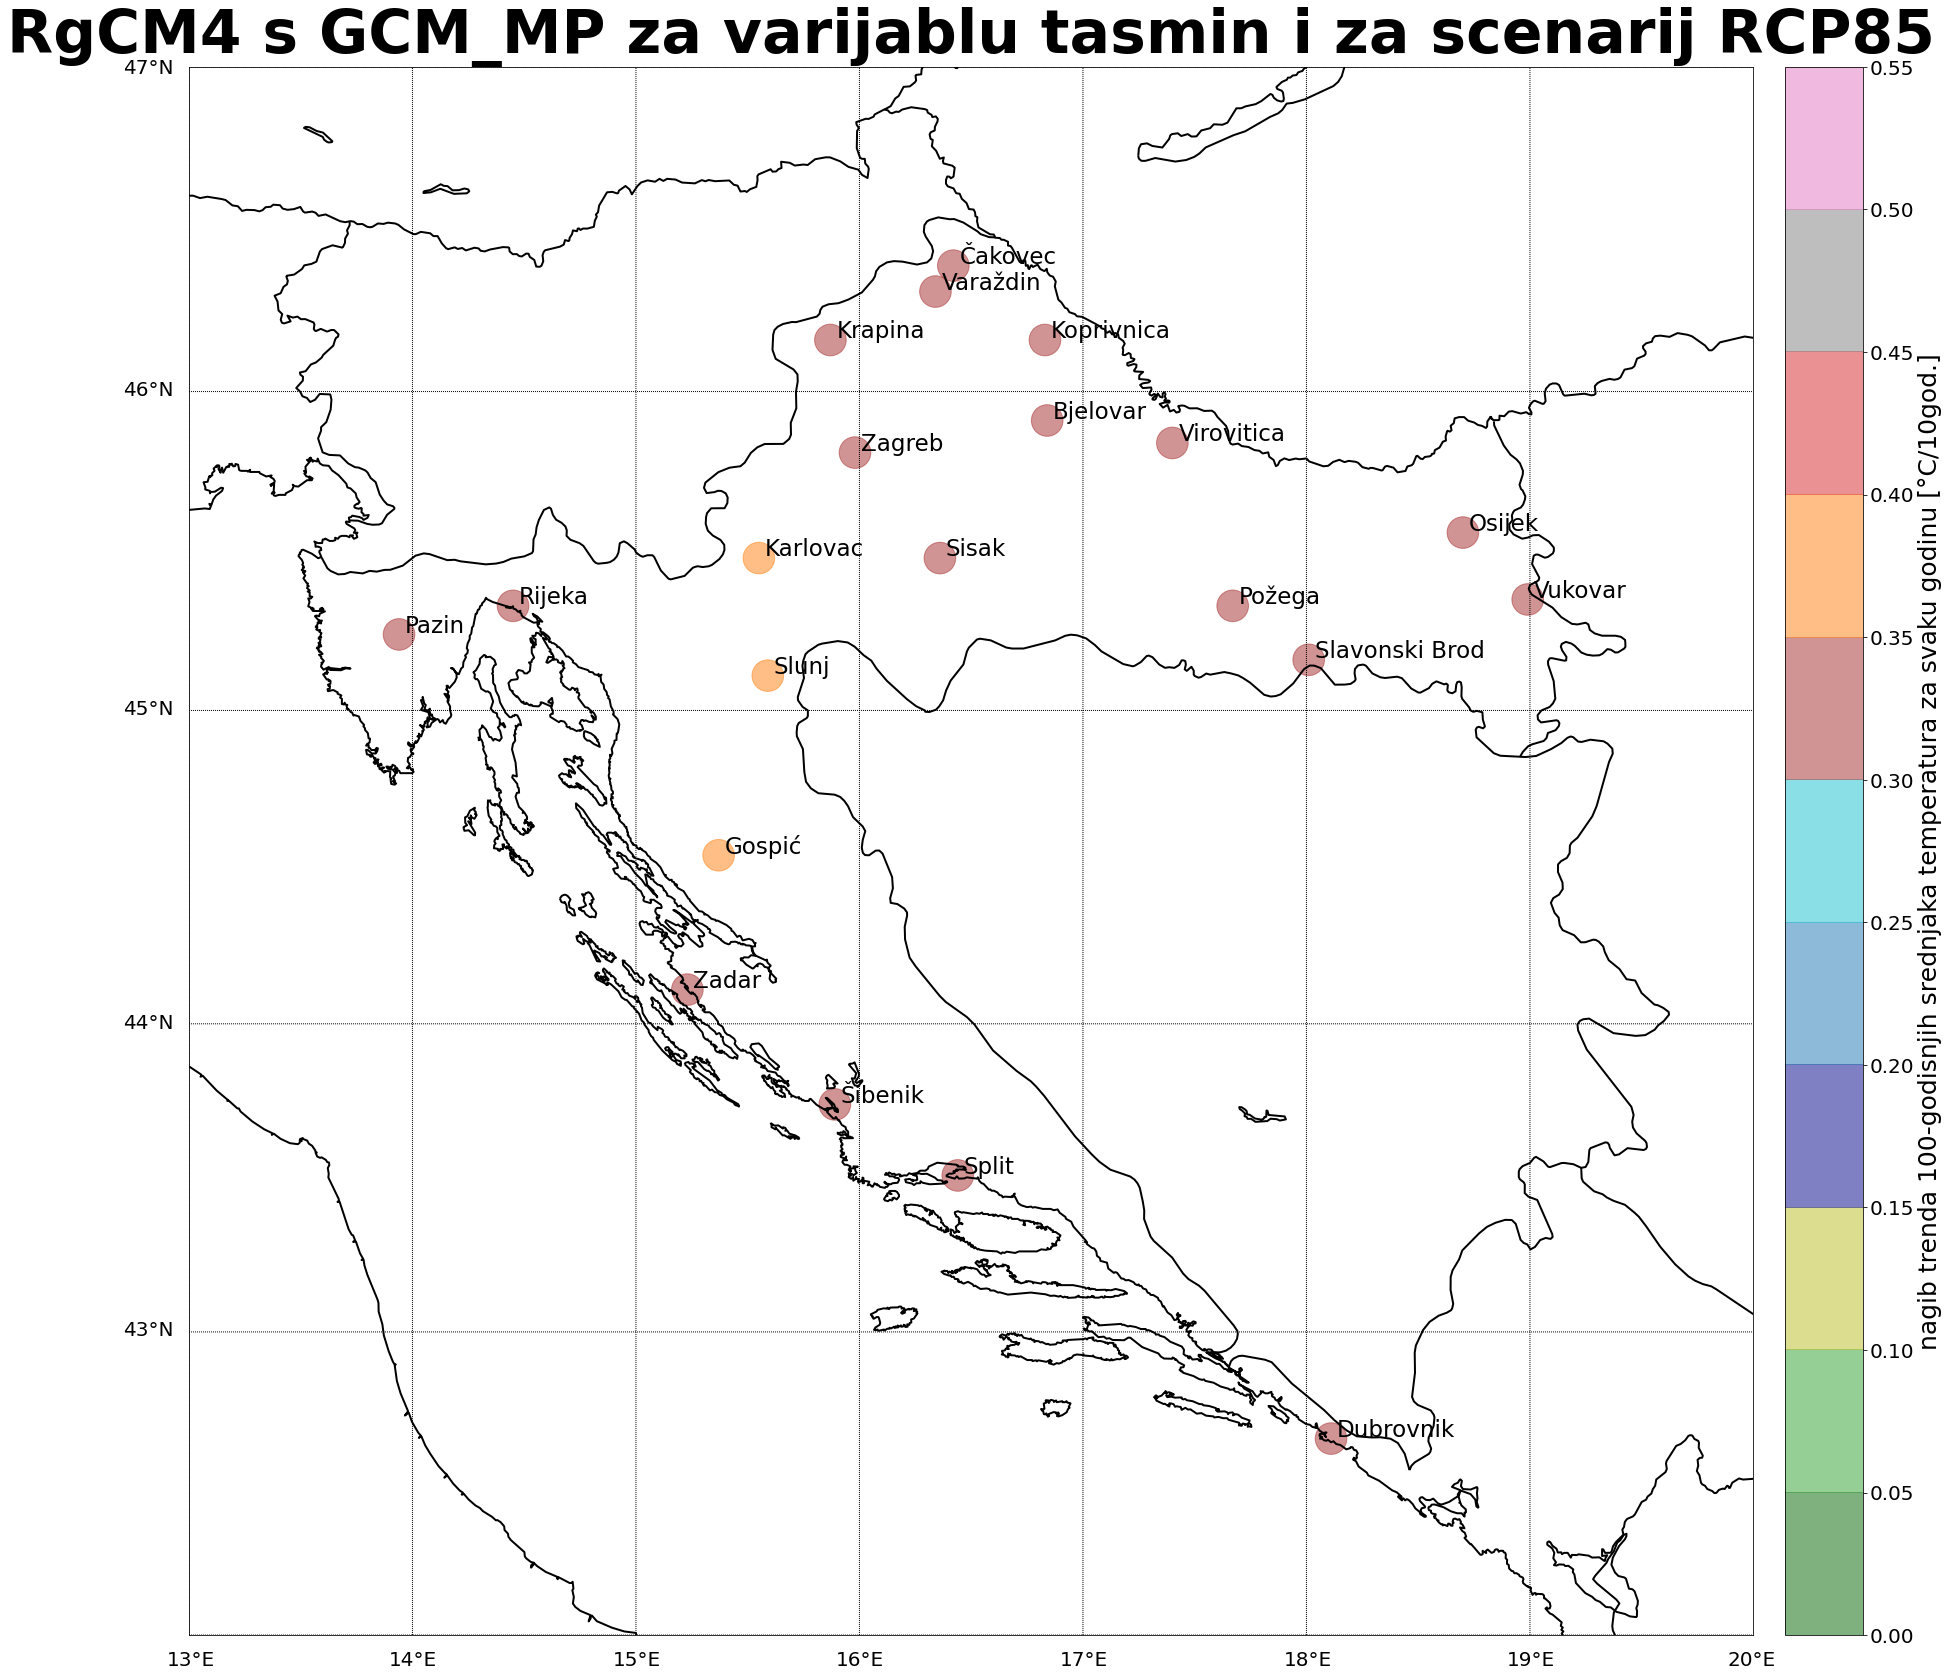

In [2]:
# Učitavanje historijske (01.01.1971.-31.12.2000.), RCP4.5 i RCP8.5 (01.01.2041.-31.12.2070.) 
# scenarija za svaku lokaciju i za svaki GCM model zasebno te tražimo nagib trenda kojeg crtamo na karti Hrv.
from netCDF4 import Dataset
import numpy as np
import numpy.ma as ma # MaskedArray
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy.linalg as LA


plt.close('all')

#Funkcije

def lin_reg(temp,godine):
    X = godine - godine.mean()
    y = temp - temp.mean()
    cxy=X.T.dot(y)
    cxx=X.T.dot(X)
    a=LA.solve(cxx,cxy)
    fit=X.dot(a)
    b = temp.mean()-a*godine.mean()
    #ep = pogreška, odstupanje fita od y 
    ep=y-fit
    # r2 = koeficijent korelacije
    r2=1-np.var(ep)/np.var(y)
    return r2,a,b,fit

def Ucitavanje (GC,RC,ts,G):
    file = '{}_{}_{}_GRAD_{}_P0_P2_yearmean.nc'.format(GC,RC,ts,G)
    fi = Dataset(file, mode='r')
    t = (fi.variables[ts][:].T).tolist()
    tm = [i for i in range(0,101)]
    for i in range (0,101):
        tm[i] = t[0][0][0][i]
    npa = np.asarray(tm).reshape(101,1)
    return tm,npa  


Gr=[i for i in range(0,22)]
Gr[1]='Zagreb'; #
Gr[2]='Krapina'; 
Gr[3]='Sisak'; #
Gr[4]='Karlovac';
Gr[5]='Varaždin'; #
Gr[6]='Koprivnica';
Gr[7]='Bjelovar';
Gr[8]='Rijeka'; #
Gr[9]='Gospić'; #
Gr[10]='Virovitica';
Gr[11]='Požega';
Gr[12]='Slavonski Brod'; #
Gr[13]='Zadar'; #
Gr[14]='Osijek'; #
Gr[15]='Šibenik';
Gr[16]='Vukovar';
Gr[17]='Split'; #
Gr[18]='Pazin'; #
Gr[19]='Dubrovnik'; #
Gr[20]='Čakovec';
Gr[21]='Slunj';


GCM = ['CN', 'EC', 'HA', 'MP']
tas = ['tasmax','tasmin']
RCP = ['RCP45', 'RCP85']
Grad = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21']
time = [i for i in range(1,102)]
timenp = np.asarray(time).reshape(101,1)
b = 0 #brojac
A = [i for i in range(0,21*16)]
for G in Grad:
    
    CNtmax45,CNtmax45np = Ucitavanje(GCM[0],RCP[0],tas[0],G)
    r2, a1, b1, fit1 = lin_reg(CNtmax45np,timenp)
    A[b] = round(a1[0,0]*10,2)
    CNtmax85,CNtmax85np = Ucitavanje(GCM[0],RCP[1],tas[0],G)
    r2, a2, b2, fit2 = lin_reg(CNtmax85np,timenp)
    A[b+21] = round(a2[0,0]*10,2)  
    
    CNtmin45,CNtmin45np = Ucitavanje(GCM[0],RCP[0],tas[1],G)
    r2, a3, b3, fit3 = lin_reg(CNtmin45np,timenp)
    A[b+21*2] = round(a3[0,0]*10,2)
    CNtmin85,CNtmin85np = Ucitavanje(GCM[0],RCP[1],tas[1],G)
    r2, a4, b4, fit4 = lin_reg(CNtmin85np,timenp)
    A[b+21*3] = round(a4[0,0]*10,2)
    
    
    ECtmax45,ECtmax45np = Ucitavanje(GCM[1],RCP[0],tas[0],G)
    r2, a5, b5, fit5 = lin_reg(ECtmax45np,timenp)
    A[b+21*4] = round(a5[0,0]*10,2)
    ECtmax85,ECtmax85np = Ucitavanje(GCM[1],RCP[1],tas[0],G)
    r2, a6, b6, fit6 = lin_reg(ECtmax85np,timenp)
    A[b+21*5] = round(a6[0,0]*10,2)
    
    ECtmin45,ECtmin45np = Ucitavanje(GCM[1],RCP[0],tas[1],G)
    r2, a7, b7, fit7 = lin_reg(ECtmin45np,timenp)
    A[b+21*6] = round(a7[0,0]*10,2)
    ECtmin85,ECtmin85np = Ucitavanje(GCM[1],RCP[1],tas[1],G)
    r2, a8, b8, fit8 = lin_reg(ECtmin85np,timenp)
    A[b+21*7] = round(a8[0,0]*10,2)
    
    
    HAtmax45,HAtmax45np = Ucitavanje(GCM[2],RCP[0],tas[0],G)
    r2, a9, b9, fit9 = lin_reg(HAtmax45np,timenp)
    A[b+21*8] = round(a9[0,0]*10,2)
    HAtmax85,HAtmax85np = Ucitavanje(GCM[2],RCP[1],tas[0],G)
    r2, a10, b10, fit10 = lin_reg(HAtmax85np,timenp)
    A[b+21*9] = round(a10[0,0]*10,2)
    
    HAtmin45,HAtmin45np = Ucitavanje(GCM[2],RCP[0],tas[1],G)
    r2, a11, b11, fit11 = lin_reg(HAtmin45np,timenp)
    A[b+21*10] = round(a11[0,0]*10,2)
    HAtmin85,HAtmin85np = Ucitavanje(GCM[2],RCP[1],tas[1],G)
    r2, a12, b12, fit12 = lin_reg(HAtmin85np,timenp)
    A[b+21*11] = round(a12[0,0]*10,2)
    
    
    MPtmax45,MPtmax45np = Ucitavanje(GCM[3],RCP[0],tas[0],G)
    r2, a13, b13, fit13 = lin_reg(MPtmax45np,timenp)
    A[b+21*12] = round(a13[0,0]*10,2)
    MPtmax85,MPtmax85np = Ucitavanje(GCM[3],RCP[1],tas[0],G)
    r2, a14, b14, fit14 = lin_reg(MPtmax85np,timenp)
    A[b+21*13] = round(a14[0,0]*10,2)
    
    MPtmin45,MPtmin45np = Ucitavanje(GCM[3],RCP[0],tas[1],G)
    r2, a15, b15, fit15 = lin_reg(MPtmin45np,timenp)
    A[b+21*14] = round(a15[0,0]*10,2)
    MPtmin85,MPtmin85np = Ucitavanje(GCM[3],RCP[1],tas[1],G)
    r2, a16, b16, fit16 = lin_reg(MPtmin85np,timenp)
    A[b+21*15] = round(a16[0,0]*10,2)
    
    b += 1
    
LON=[i for i in range(0,21)]
LAT=[i for i in range(0,21)]

LON[0]=15.98; LAT[0]=45.81;   #Zagreb
LON[1]=15.87; LAT[1]=46.16;   #Krapina 
LON[2]=16.36; LAT[2]=45.48;   #Sisak 
LON[3]=15.55; LAT[3]=45.48;   #Karlovac 
LON[4]=16.34; LAT[4]=46.31;   #Varaždin 
LON[5]=16.83; LAT[5]=46.16;   #Koprivnica 
LON[6]=16.84; LAT[6]=45.91;   #Bjelovar
LON[7]=14.45; LAT[7]=45.33;   #Rijeka
LON[8]=15.37; LAT[8]=44.54;   #Gospić
LON[9]=17.40; LAT[9]=45.84; #Virovitica
LON[10]=17.67; LAT[10]=45.33; #Požega
LON[11]=18.01; LAT[11]=45.16; #Slavonski Brod
LON[12]=15.23; LAT[12]=44.11; #Zadar
LON[13]=18.70; LAT[13]=45.56; #Osijek
LON[14]=15.89; LAT[14]=43.74; #Šibenik
LON[15]=18.99; LAT[15]=45.35; #Vukovar
LON[16]=16.44; LAT[16]=43.51; #Split
LON[17]=13.94; LAT[17]=45.24; #Pazin
LON[18]=18.11; LAT[18]=42.65; #Dubrovnik
LON[19]=16.42; LAT[19]=46.39; #Čakovec
LON[20]=15.59; LAT[20]=45.11; #Slunj




#crtamo kartu Hrvatske (samo granice zemalja) 
from netCDF4 import Dataset
import numpy as np
import numpy.ma as ma # MaskedArray
import matplotlib.pyplot as plt
import os
os.environ['PROJ_LIB'] = '/Users/domag/anaconda3/Library/share/proj' #problem kod conde i path od pospremanja paketa
from mpl_toolkits.basemap import Basemap

b = 0 #brojac
s = 0 #brojac
for G in GCM:
    for tasm in tas:
        for R in RCP:
            
            plt.figure(figsize=(30,30))
            plt.title('RgCM4 s GCM_{} za varijablu {} i za scenarij {}'.format(G,tasm,R), fontsize=60, fontweight='bold')

            map = Basemap(projection='merc',llcrnrlon=13.,llcrnrlat=42.,urcrnrlon=20.,urcrnrlat=47.,resolution='h') 
            # projection, lat/lon extents and resolution of polygons to draw
            # resolutions: c - crude, l - low, i - intermediate, h - high, f - full


            map.drawcoastlines(linewidth=2.0)
            map.drawcountries(linewidth=2.0)
            #map.drawlsmask(land_color='coral', ocean_color='aqua') # can use HTML names or codes for colors
            #map.drawcounties() # you can even add counties (and other shapefiles!)
    
            # u terminalu pise da je 2538 tocaka mreze (57 X 47); x = 54, y = 47
            #zapravo netreba uopce otvarati .nc file ta lon i lat
            #pocetna lon = 11.49; krajnja lon = 20.83
            #pocetna lat = 41.53; krajnja lat = 47.42
            #xstep=(20.83-11.49)/54
            #ystep=(47.42-41.53)/47
            xstep = 1
            ystep = 1
            parallels = np.round(np.arange(41,48,ystep),2) # make latitude lines od modela s pocetnim i konacnim 
            meridians = np.round(np.arange(13,21,xstep),2) # make longitude lines od modela s pocetnim i konacnim
    
            map.drawparallels(parallels,labels=[1,0,0,0],fontsize=20)
            map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=20)
            
    


            # convert to map projection coords.
            # Note that lon,lat can be scalars, lists or numpy arrays.


            trend = [i for i in range(0,21)]
            for i in range(0,21):
                trend[i] = A[i + 21*s]
                
            cmap = mpl.colors.ListedColormap(['darkgreen','tab:green', 'tab:olive','darkblue', 'tab:blue', 'tab:cyan','brown','tab:orange','tab:red','tab:gray','tab:pink'])    
            bounds = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55]
            norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
                  
            #trend je u boji
            pc = map.scatter(LON, LAT, latlon=True, c = trend, s = 1000, cmap=cmap, norm=norm, alpha=0.5)
            # (the offset is in map projection coordinates)
            
            for i in range(0,21):
                xpt,ypt = map(LON[i],LAT[i])
                # convert back to lat/lon
                lonpt, latpt = map(xpt,ypt,inverse=True)
                plt.text(xpt+3000,ypt+1000,Gr[i+1],fontsize=23)
                

            cbar = map.colorbar(pc, location='right', ticks = bounds)
            plt.clim(0,0.55)
            cbar.set_label(label='nagib trenda 100-godisnjih srednjaka temperatura za svaku godinu [°C/10god.]', size = 25)
            cbar.ax.tick_params(labelsize=20)
            
            
            s += 1
        
            plt.savefig("RgCM4 s GCM_{} za varijablu {} i za scenarij {}.png".format(G, tasm, R))
            plt.show()